# Biggest Pakistan's E-Commerce Dataset
### Aditya Wahyu Wijanarko - JCDS 0410 2024 - Yogyakarta Campus

The original dataset provided a comprehensive record of half a million e-commerce orders in Pakistan from March 2016 to August 2018, detailing item specifics, payment methods, customer details, and more.

# 1. Business Problem Statement
### 1.1. Problem Statement:
Analyzing the impact of discounts, payment methods, and order statuses on the sales performance and customer behavior in Pakistan’s e-commerce market. The analysis aims to uncover insights into customer preferences, product category performance, and the relationship between sales trends, discounts, and order cancellations/refunds.
### 1.2. Objectives:
1. Evaluate the influence of discounts on order value and revenue.
2. Identify the most and least preferred payment methods and their impact on order completion rates.
3. Analyze the trends in order cancellations and refunds, their correlation with sales spikes, and their effect on customer retention.
4. Investigate the performance of product categories during peak sales periods versus overall sales performance.
### 1.3. Key Questions:
1. How do discounts affect the median order value and total revenue?
2. Which payment methods are most popular, and how do they differ between discounted and non-discounted orders?
3. What are the primary factors contributing to order cancellations and refunds, and how do they correlate with total sales?
4. Which product categories generate the highest revenue and sales volume, both overall and during peak seasons?
### 1.4. Scope:
- Timeframe: Analysis of data from March 2016 to August 2018.
- Metrics: Focus on sales volume, revenue, discounts, payment methods, order statuses, and customer retention.
- Segmentation: Analysis based on product categories, payment methods, and order statuses (completed, canceled, refunded).
### 1.5. Success Criteria:
- Deriving actionable insights on the impact of discounts and payment methods on sales and customer retention.
- Identifying the product categories with the highest sales potential and understanding their performance during peak seasons.
- Providing recommendations to optimize inventory, marketing, and customer service strategies to reduce cancellations and improve customer retention.

---

# 2. Data Preparation

Please download the data used in this project through here:
[Original Data](https://www.kaggle.com/datasets/sajkazmi/cleaned-pakistan-biggest-ecommerce-dataset?select=Pakistan+Biggest+Ecommerce+Analysis-Ready+Dataset.csv)

### 2.1. Columns

There are 21 columns in the dataset with its unique identifier and description.

| **No** | **Column Name** | **Column Description**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| 1    | item_id          | Unique identifier for each item.                     |
| 2    | status        | Status of the order (e.g., complete, canceled, refunded).                         |
| 3    | created_at      | Date when the order was created.                           |
| 4    | sku        | Stock keeping unit, a unique identifier for each product.      |
| 5    | price    | Price of the item.                  |
| 6    | qty_ordered         | The country where the order was placed.                       |
| 7    | grand_total           | Total amount for the order.                          |
| 8    | increment_id          | Another identifier for the order.                        |
| 9    | category_name_1       | Category of the product (e.g., Women’s Fashion, Beauty & Grooming)..                     |
| 10   | sales_commission_code        | Code for sales commission.                |
| 11   | discount_amount     | Discount applied to the order.                        |
| 12   | payment_method        | TPayment method used (e.g., cod).                         |
| 13   | Working Date         | The date the order was processed.      |
| 14   | BI Status         | Business Intelligence status (e.g., Gross, Net).                                 |
| 15   | MV         | A metric related to the order (possibly revenue or margin value).                             |
| 16   | Year           | Year of the order.                   |
| 17   | Month        | Month of the order.                 |
| 18   | Customer Since        | Date since the customer has been associated with the platform.                     |
| 19   | M-Y        | Month-Year of the order.                             |
| 20   | FY        | Fiscal Year.                     |
| 21   | Customer ID       | Unique identifier for the customer.                           |

### 2.2. Import Libraries

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import mplcursors
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from scipy.stats import shapiro, kstest, normaltest, chi2_contingency, mannwhitneyu, ttest_ind, anderson, kruskal,spearmanr,kendalltau
import unicodedata
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

### 2.3. Load Data

In [2]:
data = pd.read_csv("Pakistan Ecommerce Dataset.csv")
data.sample(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
453407,756041,order_refunded,2/20/2018,WOFUNZ5A0C564F7F4AA-8,899.0,1,1049.00,100460763,Women's Fashion,\N,...,Easypay,2/20/2018,Valid,899,2018,2,2017-11,18-Feb,FY18,65910
291798,567845,canceled,8/17/2017,edukaan_5040w,360.0,1,4783.15,100350929,Home & Living,\N,...,cod,8/17/2017,Gross,360,2017,8,2017-8,17-Aug,FY18,58841
273007,545999,received,7/30/2017,Nimcos_Roasted-Peanuts-200gm,119.0,1,1094.00,100341112,Soghaat,R_MUX_105458,...,cod,7/30/2017,Valid,119,2017,7,2016-7,17-Jul,FY18,604
478935,785223,complete,3/15/2018,ENTNOB5A4633C950FAD,15999.0,1,13239.11,100480769,Entertainment,\N,...,Payaxis,3/15/2018,Net,"15,999",2018,3,2018-3,18-Mar,FY18,92840
576086,895714,canceled,8/11/2018,HALTOP5A6FF6F8AB818,399.0,1,2372.00,100556728,Home & Living,\N,...,bankalfalah,8/11/2018,Gross,399,2018,8,2018-8,18-Aug,FY19,114319
33223,252273,complete,9/30/2016,electro_Bluetooth Shower Speaker-White,700.0,1,350.00,100175571,Mobiles & Tablets,\N,...,Payaxis,9/30/2016,Net,700,2016,9,2016-9,16-Sep,FY17,9712
490016,797592,order_refunded,3/26/2018,MEFEDG59ACB86A1D225,4400.0,1,13200.00,100489229,Men's Fashion,\N,...,Payaxis,3/26/2018,Valid,"4,400",2018,3,2018-3,18-Mar,FY18,97938
397608,692236,complete,11/25/2017,MATSAM59DB75ADB2F80,13698.0,1,11428.10,100423592,Mobiles & Tablets,CFSD51854,...,easypay_voucher,11/25/2017,Net,"13,698",2017,11,2017-11,17-Nov,FY18,77726
363814,652695,complete,11/20/2017,MEFBNB59FC7506034B7-L,499.0,1,2496.00,100400750,Men's Fashion,\N,...,cod,11/20/2017,Net,499,2017,11,2016-8,17-Nov,FY18,3569
235781,503422,received,6/2/2017,Aybeez_ABZ-292-XL,899.0,2,2695.00,100321333,Men's Fashion,34286,...,cod,6/2/2017,Valid,"1,798",2017,6,2017-5,17-Jun,FY17,45593


2.3.1. Below is the original format data type:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584524 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584524 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  int64  
 8   category_name_1        584524 non-null  object 
 9   sales_commission_code  584524 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [4]:
data.describe()

,item_id,price,qty_ordered,grand_total,increment_id,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,5.845240e+05,584524.000000,584524.000000,584524.000000,584524.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,1.003570e+08,499.492775,2017.044115,7.167654,45791.264422
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1.152815e+05,1506.943046,0.707355,3.486305,34415.075674
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,1.000013e+08,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,1.002646e+08,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,1.003512e+08,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,1.004502e+08,160.500000,2018.000000,11.000000,73538.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,1.005624e+08,90300.000000,2018.000000,12.000000,115326.000000


### 2.4. Check Any Duplications Existed

In [5]:
data.duplicated().sum()

0

In [6]:
data[data.duplicated(keep=False)]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID


### 2.5. Check Missing Value

In [7]:
print('Missing values status:', data.isnull().values.any())
missing_values = pd.DataFrame(data.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / data.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,item_id,0,0.0
1,payment_method,0,0.0
2,FY,0,0.0
3,M-Y,0,0.0
4,Customer Since,0,0.0
5,Month,0,0.0
6,Year,0,0.0
7,MV,0,0.0
8,BI Status,0,0.0
9,Working Date,0,0.0


### 2.6. Check Unique Count And Values

In [8]:
# Check unique count and values of each column
def unique_data(data):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = data.columns
    data_unique['Unique Count'] = [data[col].nunique() for col in data.columns]
    data_unique['Unique'] = [data[col].unique() for col in data.columns]
    return data_unique

unique_data(data)

,Columns,Unique Count,Unique
0,item_id,584524,"[211131, 211133, 211134, 211135, 211136, 211137, 211138, 211139, 211140, 211141, 211142, 211143, 211144, 211145, 211146, 211147, 211149, 211150, 211151, 211152, 211153, 211154, 211155, 211156, 211157, 211158, 211160, 211162, 211163, 211164, 211166, 211168, 211169, 211170, 211171, 211172, 211173, 211174, 211175, 211176, 211177, 211179, 211180, 211182, 211184, 211185, 211186, 211187, 211188, 211189, 211190, 211191, 211192, 211193, 211194, 211196, 211197, 211198, 211199, 211200, 211202, 211201, 211203, 211204, 211205, 211206, 211207, 211208, 211209, 211211, 211212, 211213, 211214, 211215, 211217, 211218, 211219, 211220, 211221, 211222, 211223, 211225, 211224, 211226, 211227, 211228, 211229, 211230, 211231, 211232, 211233, 211234, 211235, 211236, 211237, 211238, 211239, 211240, 211241, 211242, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, Fcafe_11777-L, LC_359547105042, LC_3349668508587, RS_pheni Desi Ghee 1 kg , UK_Gulab Jamun Tin Pack 500 Gms, UK_Chum Chum Tin Pack 500 Gms, UK_Namkino Mix Nimco 200 Gms, sentiments_Ferrero Rocher Gift Box, EGO_E02377-SML

### 2.7. Set New Index

In [9]:

# Set 'Row ID' as index
data.set_index('item_id', inplace=True)

In [10]:
data.sample(10)

,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
item_id,,,,,,,,,,,,,,,,,,,,
835868,canceled,5/4/2018,ENTSON59C8D1C44939F,36300.0,1,32805.5,100519326,Entertainment,R-PEW-104414,3494.5,jazzvoucher,5/4/2018,Gross,"36,300",2018,5,2017-7,18-May,FY18,52926
670739,complete,11/23/2017,WOFCHA59F343A59DBC8,3649.0,1,2919.2,100410767,Women's Fashion,\N,729.8,Easypay,11/23/2017,Net,"3,649",2017,11,2017-6,17-Nov,FY18,51043
266919,complete,10/23/2016,BO_shovel-truck-orange,290.0,1,290.0,100185626,Kids & Baby,\N,0.0,cod,10/23/2016,Net,290,2016,10,2016-9,16-Oct,FY17,6539
733151,canceled,1/21/2018,WOFDEA59F1ED69DE824,899.0,1,2697.0,100446804,Women's Fashion,\N,0.0,cod,1/21/2018,Gross,899,2018,1,2017-11,18-Jan,FY18,81494
288373,canceled,11/19/2016,RS_Habshi Halwa Tin,270.0,1,189.0,100199692,Soghaat,\N,81.0,jazzwallet,11/19/2016,Gross,270,2016,11,2016-11,16-Nov,FY17,15157
342711,complete,11/25/2016,Lala_2151004300066-SCS-06B,1950.0,1,8362.4,100234060,Women's Fashion,\N,0.0,cod,11/25/2016,Net,"1,950",2016,11,2016-11,16-Nov,FY17,24805
892365,canceled,8/2/2018,COMDEL5B5704E660B1A,35051.0,1,35351.0,100554842,Computing,\N,0.0,bankalfalah,8/2/2018,Gross,"35,051",2018,8,2018-4,18-Aug,FY19,105971
803148,canceled,3/27/2018,OTHPCB5AB351ED89FD7,5000.0,3,15000.0,100494486,Others,\N,0.0,bankalfalah,3/27/2018,Gross,"15,000",2018,3,2018-3,18-Mar,FY18,99150
833073,complete,4/30/2018,WOFVST5A93B3459E903,995.0,1,1175.0,100517298,Women's Fashion,\N,0.0,cod,4/30/2018,Net,995,2018,4,2016-7,18-Apr,FY18,2079


Reason  : Column 'item_id' has number of unique values as much as the number of rows, therefore it is possible to make the column as the new index

### 2.8. Drop Columns

In [11]:
# Drop some columns that are less relevant for next steps
columns_to_drop = ['increment_id', 'sales_commission_code', 'BI Status', 'M-Y', 'FY', 'Working Date']
data = data.drop(columns=columns_to_drop)
data.sample(10)

,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,MV,Year,Month,Customer Since,Customer ID
item_id,,,,,,,,,,,,,,
678958,received,11/24/2017,BAGKUR59AD6241D0CAA,898.0,1,1897.0,Beauty & Grooming,0.0,cod,898,2017,11,2017-7,55963
824677,canceled,4/15/2018,HALSHO59F86639EDEAE,353.0,1,1659.0,Home & Living,0.0,cod,353,2018,4,2018-3,97302
449415,complete,4/17/2017,edukaan_7137-A4 - 150 Pages Pad,192.0,1,726.0,School & Education,0.0,cod,192,2017,4,2016-12,28782
578093,order_refunded,9/7/2017,MEFPUC59ABF139D25C9-45,1750.0,1,1250.0,Men's Fashion,500.0,cod,"1,750",2017,9,2017-8,58793
530523,complete,7/10/2017,jj_JLAWN-S-17-041 Grey Tree,2785.0,1,785.0,Women's Fashion,2000.0,cod,"2,785",2017,7,2017-7,53575
347193,complete,11/26/2016,CK_BF730-Vest-Pack of 3-L,599.0,1,2048.0,Men's Fashion,0.0,cod,599,2016,11,2016-11,25556
821134,complete,4/7/2018,SOGAMB5A09BA25616A0,190.0,1,1154.0,Soghaat,0.0,cod,190,2018,4,2016-8,2683
618082,complete,11/17/2017,MATSAM59DB75ADB2F80,14000.0,1,11970.0,Mobiles & Tablets,2030.0,easypay_voucher,"14,000",2017,11,2017-11,67385
650736,complete,11/20/2017,APPDAW59F97AFF95276,5499.0,1,4226.4,Appliances,1272.6,easypay_voucher,"5,499",2017,11,2017-11,72697


| **Rationale** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| increment_id      | It seems redundant with item_id and may not add significant value to the analysis.    |
| sales_commission_code      | If there is no specific analysis around sales commissions, this could be dropped.     |
| BI Status      | If this status column is unclear or not contributing meaningful insights, it might be worth dropping.    |
| M-Y      | This might be redundant since we already have the Year and Month columns.     |
| FY      | Similar to M-Y, if fiscal year analysis is not required, it could be dropped.    |
| Working Date      | The columns created_at and Working Date contain the same values for each row, as indicated by the fact that both have the same number of unique values and are identical across the dataset.     |

### 2.9. Anomaly Check

2.9.1. Change a category in 'status' column

In [12]:
# Combine 'order_refunded' and 'refund' into a single status
data['status'] = data['status'].replace({'refund': 'order_refunded'})

--

2.9.2. Change Data Types

In [13]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['Customer Since'] = pd.to_datetime(data['Customer Since'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 211131 to 905208
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   status           584524 non-null  object        
 1   created_at       584524 non-null  datetime64[ns]
 2   sku              584524 non-null  object        
 3   price            584524 non-null  float64       
 4   qty_ordered      584524 non-null  int64         
 5   grand_total      584524 non-null  float64       
 6   category_name_1  584524 non-null  object        
 7   discount_amount  584524 non-null  float64       
 8   payment_method   584524 non-null  object        
 9    MV              584524 non-null  object        
 10  Year             584524 non-null  int64         
 11  Month            584524 non-null  int64         
 12  Customer Since   584524 non-null  datetime64[ns]
 13  Customer ID      584524 non-null  int64         
dtypes: datetime64[ns](2)

--

2.9.3. Columns Name Change

In [16]:
# Dictionary of old column names and new column names
new_column_names = {
    'item_id': 'Item_ID',
    'created_at': 'Order_Creation_Date',
    'sku': 'Product_SKU',
    'price': 'Price',
    'qty_ordered': 'Quantity_Ordered',
    'grand_total': 'Order_Total',
    'category_name_1': 'Product_Category',
    'discount_amount': 'Discount_Amount',
    'payment_method': 'Payment_Method',
    ' MV ': 'Market_Value',
    'Year': 'Year',
    'Month': 'Month',
    'Customer Since': 'Customer_Since_Date',
    'Customer ID': 'Customer_ID'
}

# Rename the columns
data.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame columns
data.columns

Index(['status', 'Order_Creation_Date', 'Product_SKU', 'Price',
       'Quantity_Ordered', 'Order_Total', 'Product_Category',
       'Discount_Amount', 'Payment_Method', 'Market_Value', 'Year', 'Month',
       'Customer_Since_Date', 'Customer_ID'],
      dtype='object')

In [53]:
data.sample(10)

,status,Order_Creation_Date,Product_SKU,Price,Quantity_Ordered,Order_Total,Product_Category,Discount_Amount,Payment_Method,Market_Value,Year,Month,Customer_Since_Date,Customer_ID,Payment_Method_Encoded,Product_Category_Encoded,Status_Encoded
item_id,,,,,,,,,,,,,,,,,
671876,canceled,2017-11-23,MATHUA5A0C4EF37A279,21093.0,1,18293.00,Mobiles & Tablets,2800.00,easypay_voucher,"21,093",2017,11,2017-06-01,50178,8,9,1
382341,complete,2017-01-05,RS_Honey Dry Fruit Halwa,325.0,1,325.00,Soghaat,0.00,cod,325,2017,1,2016-07-01,44,6,12,4
828463,complete,2018-04-19,WOFJUN59FB0FA5C54ED,2442.5,1,9220.00,Women's Fashion,0.00,cod,"2,443",2018,4,2017-11-01,79691,6,14,4
875674,cod,2018-06-23,HALHOM5ACF02973C2C5,49.0,1,1146.00,Home & Living,0.00,cod,49,2018,6,2018-03-01,93485,6,6,3
766660,complete,2018-02-27,WOFDEA5A44C033F2B77-36,499.0,1,77.00,Women's Fashion,0.00,cod,499,2018,2,2018-02-01,87369,6,14,4
496851,canceled,2017-05-22,AYS_32B8500-32-Inches,19485.0,1,15610.75,Entertainment,3874.25,Payaxis,"19,485",2017,5,2017-05-01,47908,2,4,1
719382,order_refunded,2017-12-20,MATUMW5A3A36429918C,0.0,2,150.00,Mobiles & Tablets,0.00,cod,-,2017,12,2017-12-01,83772,6,9,8
580290,complete,2017-09-14,MATSAM59B7E8D0328D0,13742.0,1,13742.00,Mobiles & Tablets,0.00,cod,"13,742",2017,9,2017-04-01,42954,6,9,4
886165,received,2018-07-17,SADTRA5A463218C11D9,999.0,1,2248.00,School & Education,0.00,cod,999,2018,7,2018-07-01,113065,6,11,14


- Rationale from columns name change:
    - Improved Clarity.
    - Consistency.
    - Ease of Use in Analysis.
    - Minimizing Errors.

### 2.10. Check Outliers

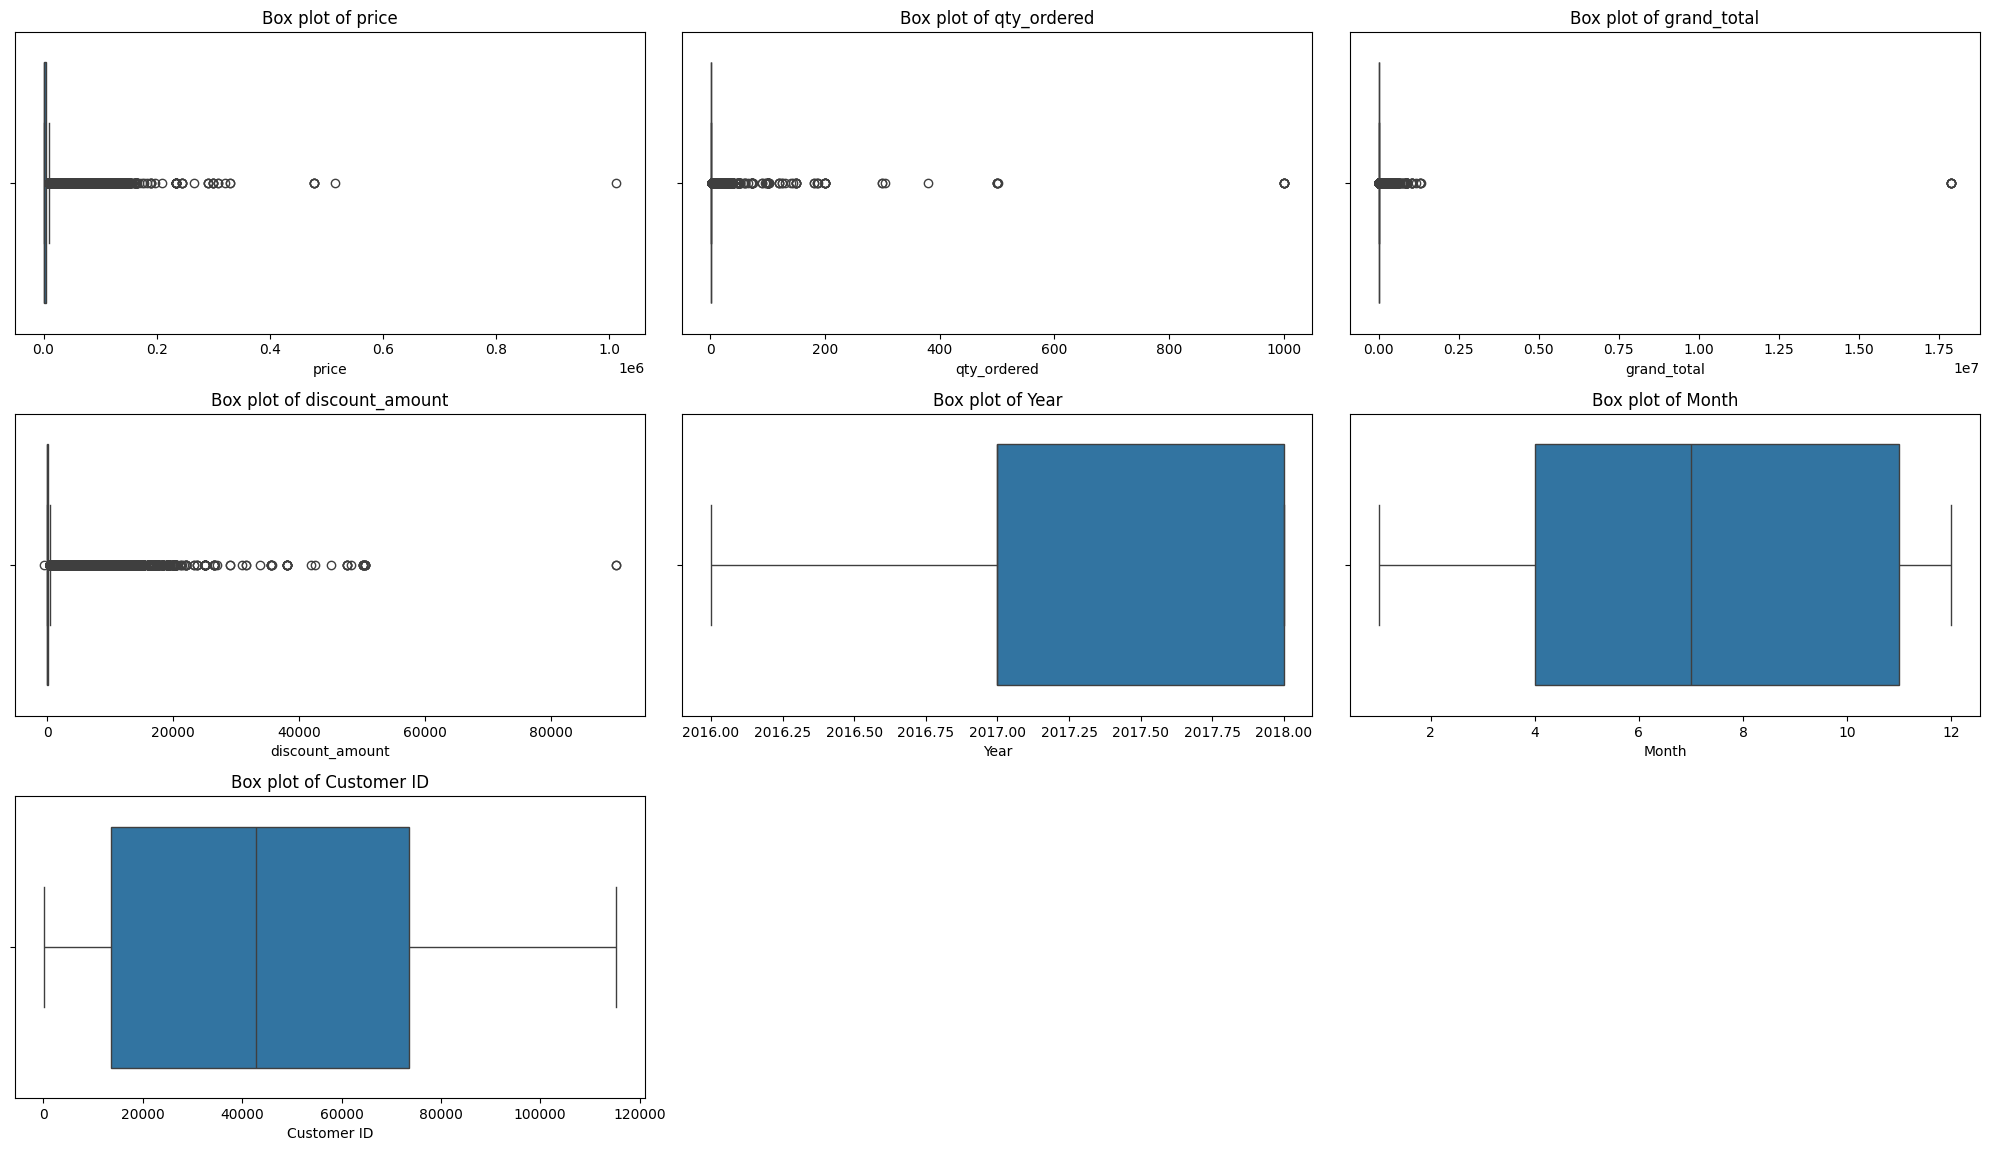

In [14]:
# Box plots to identify outliers
def plot_boxplots(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x=data[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

# Plotting box plots for outliers
plot_boxplots(data)

In [15]:
# Function to calculate the number of outliers in each column and return as DataFrame
def count_outliers_df(data):
    outlier_counts = {'Column': [], 'Outlier Count': []}
    
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts['Column'].append(col)
        outlier_counts['Outlier Count'].append(len(outliers))
        
    return pd.DataFrame(outlier_counts)

# Calculate the number of outliers for each numerical column and convert to DataFrame
outlier_counts_df = count_outliers_df(data)

# Show the DataFrame
outlier_counts_df

,Column,Outlier Count
0,price,105687
1,qty_ordered,79310
2,grand_total,77090
3,discount_amount,108986
4,Year,0
5,Month,0
6,Customer ID,0


- Insights

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Box Plots      | The box plots reveal that the distribution of data in these columns is heavily skewed, with most of the data concentrated in a narrow range and a few extreme values stretching the scale.    |
|       | Price and grand_total show a few data points that are significantly higher than the rest, indicating potential anomalies or special cases.     |
|       | Qty_ordered shows that while most orders involve a small number of items, there are a few orders with a very high quantity, which could either be bulk orders or data errors.   |
|     | Discount_amount shows many transactions with small discounts, but some have extremely high discounts, which could be promotional campaigns or data entry issues.     |
| Outliers in the Data     | Price, qty_ordered, grand_total, and discount_amount:    |
|       | These columns have significant numbers of outliers, as shown in both the box plots and the outlier count table.     |
|       | Price has over 100,000 outliers, indicating a wide range of values with some very high prices that could be anomalies or special cases (e.g., bulk purchases, high-value items).   |
|     | Qty_ordered and grand_total also show substantial outliers, which may suggest unusually large orders or errors in data entry.     |
|     | Discount_amount has the highest number of outliers, which could indicate extreme discounts applied to certain transactions.    |
| Normal Data Columns     | Year, Month, Customer ID:    |
|       | These columns do not have any outliers, indicating that the data for these fields is consistent and within expected ranges. The distribution for Year and Month looks normal, with no significant deviations.     |
| Keeping Outliers     | Representation of Real Business Scenarios.    |
|       | Identifying Niche Markets.     |
|       | Comprehensive Analysis.     |
|       | Understanding the Extremes.     |
|       | Strategic Decision-Making.     |
|       | Trend Analysis.     |
|       | Avoiding Data Loss.    |

---

# 3. Data Analysis

### 3.1. Number of Discounts In The Dataset

In [18]:
# Count the number of orders that received a discount
discounted_orders_count = data[data['Discount_Amount'] > 0].shape[0]

discounted_orders_count

208215

In [19]:
# Calculate the total number of orders
total_orders = data.shape[0]

# Calculate the ratio of discounted orders to total orders
discount_ratio = discounted_orders_count / total_orders

discount_ratio

0.3562129185456885

- Insight:
    - Out of the total number of orders, approximately 35.62% received a discount. This suggests that a significant portion of the orders in the Pakistan E-commerce market involved some form of discount, which could be an important factor influencing customer purchasing behavior and retention.

--

### 3.2. Discounted And Non-Discounted Orders Analysis

In [20]:
# Filter discounted and non-discounted orders
discounted_orders = data[data['Discount_Amount'] > 0]
non_discounted_orders = data[data['Discount_Amount'] == 0]

In [21]:
discounted_orders

,status,Order_Creation_Date,Product_SKU,Price,Quantity_Ordered,Order_Total,Product_Category,Discount_Amount,Payment_Method,Market_Value,Year,Month,Customer_Since_Date,Customer_ID
item_id,,,,,,,,,,,,,,
211135,complete,2016-07-01,kcc_krone deal,360.0,1,60.00,Beauty & Grooming,300.00,cod,360,2016,7,2016-07-01,4
211138,complete,2016-07-01,kcc_krone deal,360.0,1,60.00,Beauty & Grooming,300.00,cod,360,2016,7,2016-07-01,7
211170,order_refunded,2016-07-01,Veet_4,165.0,1,300.00,Beauty & Grooming,82.50,cod,165,2016,7,2016-07-01,21
211171,order_refunded,2016-07-01,RS_Gulab jaman Tin,435.0,1,300.00,Soghaat,217.50,cod,435,2016,7,2016-07-01,21
211175,complete,2016-07-01,cr_PEANUT SALTY-200 GM,90.0,1,740.00,Soghaat,19.15,cod,90,2016,7,2016-07-01,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905091,order_refunded,2018-08-27,MATBIZ5A702C575969E,145.0,1,326.01,Mobiles & Tablets,299.99,cod,145,2018,8,2017-11-01,69407
905092,order_refunded,2018-08-27,MEFEZI5B7169B92D153,275.0,1,326.01,Men's Fashion,299.99,cod,275,2018,8,2017-11-01,69407
905093,order_refunded,2018-08-27,HASQAR5A618CC063535,189.0,1,326.01,Health & Sports,299.99,cod,189,2018,8,2017-11-01,69407


In [22]:
non_discounted_orders

,status,Order_Creation_Date,Product_SKU,Price,Quantity_Ordered,Order_Total,Product_Category,Discount_Amount,Payment_Method,Market_Value,Year,Month,Customer_Since_Date,Customer_ID
item_id,,,,,,,,,,,,,,
211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,Women's Fashion,0.0,cod,"1,950",2016,7,2016-07-01,1
211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1,240.0,Beauty & Grooming,0.0,cod,240,2016,7,2016-07-01,2
211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,Women's Fashion,0.0,cod,"2,450",2016,7,2016-07-01,3
211136,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,Soghaat,0.0,cod,"1,110",2016,7,2016-07-01,5
211137,canceled,2016-07-01,UK_Namkino All In One 200 Gms,80.0,1,80.0,Soghaat,0.0,cod,80,2016,7,2016-07-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905204,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1,849.0,Women's Fashion,0.0,cod,699,2018,8,2018-08-01,115320
905205,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1,35899.0,Mobiles & Tablets,0.0,bankalfalah,"35,599",2018,8,2018-08-01,115326
905206,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2,652178.0,Mobiles & Tablets,0.0,bankalfalah,"259,998",2018,8,2018-07-01,113474


--

3.2.1. MOV (Median Order Value)
- Given the skewed distribution in the box plots, using the median instead of the average (mean) might be more appropriate, especially for calculating the Average Order Value (AOV).
- Reasons:

| **Reason** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Robustness to Outliers     | The median is less affected by extreme values or outliers. Since the distribution is skewed, the mean could be disproportionately influenced by a few very high or very low values, leading to a potentially misleading representation of the central tendency.    |
|  Better Representation of Central Tendency     | In skewed distributions, the median provides a better sense of the “typical” value, as it represents the middle point of the data, where 50% of the values are below and 50% are above.     |
| Skewed Data Consideration      | In the presence of skewness, the mean tends to be pulled in the direction of the skew, while the median remains a more reliable measure of central tendency.   |

--

3.2.2. MOV of Discounted And Non-Discounted Orders

In [23]:
# Calculate Median Order Value (MOV)
mov_discounted = discounted_orders['Order_Total'].median()
mov_non_discounted = non_discounted_orders['Order_Total'].median()

In [24]:
print(f"₹ {mov_discounted:,.2f}")
print(f"₹ {mov_non_discounted:,.2f}")

₹ 3,063.64
₹ 1,590.00


- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Higher Median Order Value with Discounts     | Orders that received a discount have a significantly higher median value (₹3,063.64) compared to those that did not receive a discount (₹1,590.00).    |
|       | This suggests that discounts may be encouraging customers to spend more on their orders. The higher median value indicates that, on average, customers are purchasing more or higher-value items when discounts are applied.     |
| Discounts as a Strategy to Increase Sales     | The fact that the median order value is nearly double for discounted orders could imply that discounts are an effective strategy for increasing the average amount spent by customers. This is a critical insight for determining pricing and promotional strategies.   |
| Customer Behavior     | The result could also suggest that customers are more likely to place larger orders when they perceive they are getting a better deal through discounts. This can be useful for understanding customer purchasing behavior and tailoring marketing campaigns.   |

--

3.2.3. Revenue Discounted

In [25]:
# Calculate Revenue Contribution
revenue_discounted = discounted_orders['Order_Total'].sum()
revenue_non_discounted = non_discounted_orders['Order_Total'].sum()

In [26]:
print(f"₹ {revenue_discounted:,.2f}")
print(f"₹ {revenue_non_discounted:,.2f}")

₹ 1,951,345,687.64
₹ 3,034,995,052.43


- Insights

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Revenue Distribution     | Non-discounted orders contribute more significantly to the total revenue, amounting to approximately ₹ 3.03 billion, compared to ₹ 1.95 billion from discounted orders.    |
|       | This result suggests that despite the higher median order value observed in discounted orders, the overall revenue is still predominantly driven by non-discounted transactions.     |
| Order Volume Consideration     | The higher total revenue from non-discounted orders could indicate that a larger volume of transactions occurs without discounts, or that higher-value items are frequently purchased without discounts.   |
| Potential Influence of Order Volume     | The higher revenue from non-discounted orders might indicate a larger volume of non-discounted transactions, despite individual discounted orders having higher median values.   |
|      | This could also imply that discounts are applied selectively, perhaps only on certain products or during specific promotions, leading to a lower overall revenue share compared to non-discounted orders.   |
| Strategic Insights     | While discounts are effective in boosting the order value, they may not be sufficient to surpass the revenue generated by non-discounted orders. Therefore, a balanced approach to discounting is essential—one that maximizes order value without significantly impacting overall revenue.   |

--

3.2.4. Data Visualization

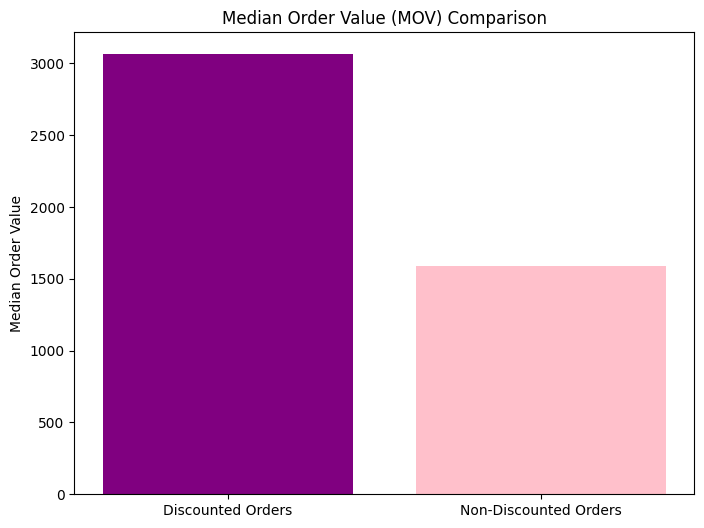

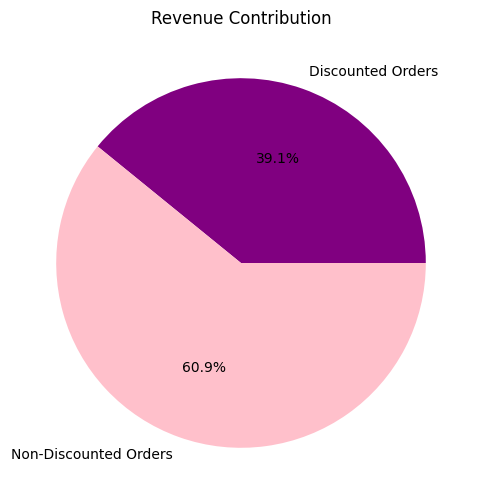

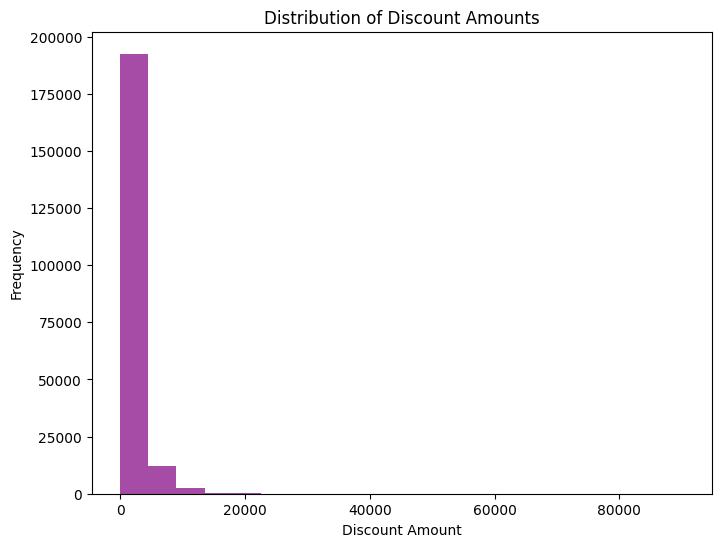

In [27]:
# Bar Chart for MOV
plt.figure(figsize=(8, 6))
plt.bar(['Discounted Orders', 'Non-Discounted Orders'], [mov_discounted, mov_non_discounted], color=['purple', 'pink'])
plt.title('Median Order Value (MOV) Comparison')
plt.ylabel('Median Order Value')
plt.show()

# Pie Chart for Revenue Contribution
plt.figure(figsize=(8, 6))
plt.pie([revenue_discounted, revenue_non_discounted], labels=['Discounted Orders', 'Non-Discounted Orders'], autopct='%1.1f%%', colors=['purple', 'pink'])
plt.title('Revenue Contribution')
plt.show()

# Histogram for Discount Levels
plt.figure(figsize=(8, 6))
plt.hist(discounted_orders['Discount_Amount'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Discount Amounts')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()

--

### 3.3. Discount Distribution

3.3.1. Discount Distribution Analysis

In [28]:
# Round the discount distribution statistics to 2 decimal places
discount_distribution = discounted_orders['Discount_Amount'].describe().round(2)

# Format all statistics except 'count' with the Rupee symbol
discount_distribution['count'] = int(discount_distribution['count'])
discount_distribution.iloc[1:] = discount_distribution.iloc[1:].apply(lambda x: f"₹ {x:,.2f}")

print(discount_distribution)

count       208215.0
mean      ₹ 1,402.23
std       ₹ 2,260.36
min           ₹ 0.08
25%         ₹ 123.00
50%         ₹ 480.00
75%       ₹ 1,995.00
max      ₹ 90,300.00
Name: Discount_Amount, dtype: object


- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Distribution of Discounts     | The majority of discounts are relatively small, with the median discount being ₹ 480.00, which is much lower than the mean of ₹ 1,402.23. This suggests that while most discounts are modest, there are some larger discounts that increase the mean.   |
| Skewness      | The distribution is likely skewed to the right, given the large difference between the mean and the median, along with the high maximum discount of ₹ 90,300.00. This skewness suggests that while most discounts are small, there are outliers with significantly larger discounts.     |
| Strategic Implications    | The higher total revenue from non-discounted orders could indicate that a larger volume of transactions occurs without discounts, or that higher-value items are frequently purchased without discounts.   |
| Potential Influence of Order Volume     | The presence of a few large discounts alongside many smaller ones could imply targeted promotional strategies, where larger discounts are applied selectively to certain high-value products or during special campaigns.   |
|      | Understanding this distribution can help in optimizing discount strategies, potentially focusing on where discounts are most effective in driving sales without heavily impacting overall profitability.   |

--

### 3.4.  Payment Method Analysis
1. This table helps understand how different payment methods are used by customers who receive discounts versus those who do not. It focuses on the number of orders associated with each payment method.
2. Analyzes the quantity of orders by payment method and provides insights into customer preferences regarding payment methods based on whether they received a discount or not.

3.4.1. Distribution of Payment Method For Discounted And Non-Discounted Orders

In [29]:
# Payment Method Distribution
payment_method_distribution_discounted = discounted_orders['Payment_Method'].value_counts()
payment_method_distribution_non_discounted = non_discounted_orders['Payment_Method'].value_counts()

In [30]:
# Create a DataFrame to compare payment method distribution between discounted and non-discounted orders
payment_method_distribution = pd.DataFrame({
    'Discounted_Orders': payment_method_distribution_discounted,
    'Non_Discounted_Orders': payment_method_distribution_non_discounted
})

# Fill NaN values with 0 to handle any missing payment methods in either category
payment_method_distribution.fillna(0, inplace=True)

# Calculate the total for each category
total_discounted = payment_method_distribution['Discounted_Orders'].sum()
total_non_discounted = payment_method_distribution['Non_Discounted_Orders'].sum()

# Add percentage columns
payment_method_distribution['Discounted_Orders_Percentage'] = (payment_method_distribution['Discounted_Orders'] / total_discounted) * 100
payment_method_distribution['Non_Discounted_Orders_Percentage'] = (payment_method_distribution['Non_Discounted_Orders'] / total_non_discounted) * 100

# Format the percentage columns as strings with a percentage sign
payment_method_distribution['Discounted_Orders_Percentage'] = payment_method_distribution['Discounted_Orders_Percentage'].map('{:.2f}%'.format)
payment_method_distribution['Non_Discounted_Orders_Percentage'] = payment_method_distribution['Non_Discounted_Orders_Percentage'].map('{:.2f}%'.format)

# Display the DataFrame
payment_method_distribution

,Discounted_Orders,Non_Discounted_Orders,Discounted_Orders_Percentage,Non_Discounted_Orders_Percentage
Payment_Method,,,,
Easypay,44606.0,38294,21.42%,10.18%
Easypay_MA,8376.0,5652,4.02%,1.50%
Payaxis,60280.0,37358,28.95%,9.93%
apg,608.0,1150,0.29%,0.31%
bankalfalah,6736.0,16329,3.24%,4.34%
cashatdoorstep,1.0,731,0.00%,0.19%
cod,23792.0,248168,11.43%,65.95%
customercredit,987.0,6568,0.47%,1.75%
easypay_voucher,25496.0,5680,12.25%,1.51%


--

3.4.2. Data Visualization

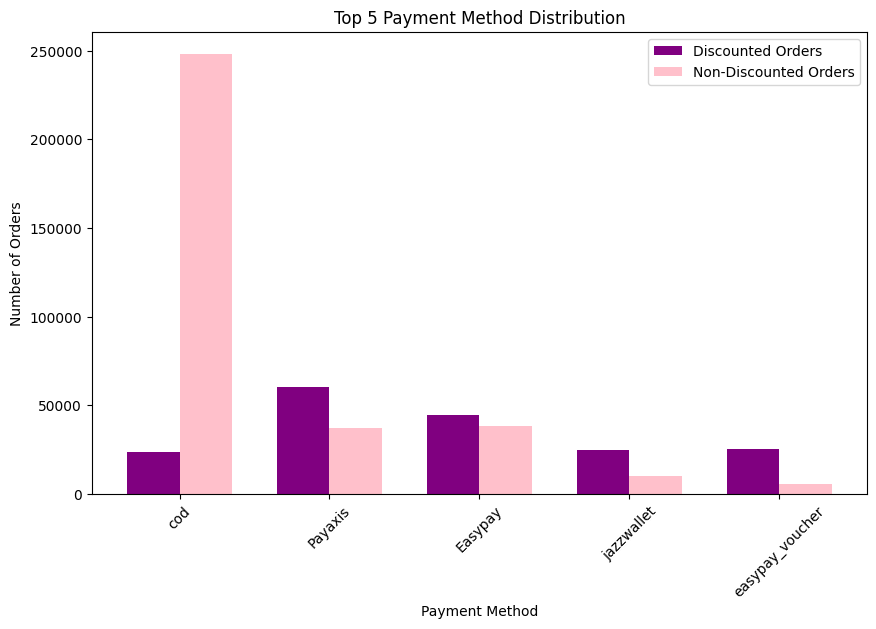

In [31]:

# Select the top 5 payment methods by total orders (Discounted + Non-Discounted)
payment_method_distribution['Total_Orders'] = payment_method_distribution['Discounted_Orders'] + payment_method_distribution['Non_Discounted_Orders']
payment_method_distribution_top5 = payment_method_distribution.sort_values(by='Total_Orders', ascending=False).head(5)

# Plotting Payment Method Distribution (Top 5) - Side by Side Bar Chart
bar_width = 0.35
index = np.arange(len(payment_method_distribution_top5))

plt.figure(figsize=(10, 6))
plt.bar(index, payment_method_distribution_top5['Discounted_Orders'], bar_width, color='purple', label='Discounted Orders')
plt.bar(index + bar_width, payment_method_distribution_top5['Non_Discounted_Orders'], bar_width, color='pink', label='Non-Discounted Orders')

plt.title('Top 5 Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(index + bar_width / 2, payment_method_distribution_top5.index, rotation=45)
plt.legend()

plt.show()

- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Dominance of COD (Cash on Delivery) for Non-Discounted Orders     | The cod (Cash on Delivery) payment method is overwhelmingly dominant among non-discounted orders, accounting for 65.95% of them. This suggests that a significant portion of customers who do not receive discounts prefer to pay via COD.   |
|     | In contrast, COD accounts for only 11.43% of discounted orders. This indicates that customers who receive discounts might be more likely to use other payment methods.     |
| Popularity of Easypay, Easypay_Voucher, and Payaxis for Discounted Orders    | Payaxis leads with 28.95% of discounted orders, followed by Easypay at 21.42%, and easypay_voucher at 12.25%. These methods are much more popular among customers who receive discounts.  |
|     | In non-discounted orders, these payment methods account for a much smaller percentage, highlighting that these payment methods may be specifically incentivized or preferred in transactions where discounts are applied.   |
|  Variation in Payment Method Preferences    | There is a noticeable difference in payment method preferences between discounted and non-discounted orders. For instance, while Easypay and Payaxis are popular among discounted orders, they are much less so among non-discounted orders.   |
|     | This variation suggests that certain payment methods might be tied to discount offers or promotional activities, influencing customer choice.   |
|  Low Utilization of Some Payment Methods    | Some payment methods like cashatdoorstep, internetbanking, jazzvoucher, and mygateway have minimal usage in both discounted and non-discounted orders. These methods might not be widely adopted by customers or may not be prominently featured in promotional activities.   |

- Strategic Implications:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Promotional Strategy    | The significant difference in payment method preferences between discounted and non-discounted orders suggests that promotional activities might be influencing payment method choice. This could indicate that customers are being incentivized to use certain payment methods through discounts.   |
| Targeting Based on Payment Method    | The company could consider targeting specific payment methods with further discounts or offers, particularly those already popular among discounted orders like Easypay and Payaxis, to further drive sales.     |
| Reevaluating Payment Method Offerings    | For payment methods with very low usage, it might be worth investigating whether these methods should continue to be offered or if they require more promotion to increase adoption.  |

### 3.5. MOV by Payment Method

- This table helps understand how different payment methods influence the value of orders when discounts are applied. It focuses on the value of orders (MOV) associated with each payment method.
- Analyzes the value of orders by payment method and provides insights into how different payment methods affect the monetary value of orders, particularly when discounts are applied.

3.5.1. MOV of Discounted And Non-Discounted Orders By Payment Method

In [32]:
# Calculate MOV by Payment Method
mov_by_payment_discounted = discounted_orders.groupby('Payment_Method')['Order_Total'].median()
mov_by_payment_non_discounted = non_discounted_orders.groupby('Payment_Method')['Order_Total'].median()

In [33]:
# Create a DataFrame to compare MOV by payment method between discounted and non-discounted orders
mov_by_payment = pd.DataFrame({
    'Discounted_Orders_MOV': mov_by_payment_discounted,
    'Non_Discounted_Orders_MOV': mov_by_payment_non_discounted
})

# Fill NaN values with 0 to handle any missing payment methods in either category
mov_by_payment.fillna(0, inplace=True)

# Format the MOV columns with Rupee symbol
mov_by_payment['Discounted_Orders_MOV'] = mov_by_payment['Discounted_Orders_MOV'].apply(lambda x: f"₹ {x:,.2f}")
mov_by_payment['Non_Discounted_Orders_MOV'] = mov_by_payment['Non_Discounted_Orders_MOV'].apply(lambda x: f"₹ {x:,.2f}")

# Calculate the total MOV for each category (without formatting for accurate calculation)
total_mov_discounted = mov_by_payment_discounted.sum()
total_mov_non_discounted = mov_by_payment_non_discounted.sum()

# Add percentage columns
mov_by_payment['Discounted_Orders_Percentage'] = (mov_by_payment_discounted / total_mov_discounted) * 100
mov_by_payment['Non_Discounted_Orders_Percentage'] = (mov_by_payment_non_discounted / total_mov_non_discounted) * 100

# Format the percentage columns as strings with a percentage sign
mov_by_payment['Discounted_Orders_Percentage'] = mov_by_payment['Discounted_Orders_Percentage'].map('{:.2f}%'.format)
mov_by_payment['Non_Discounted_Orders_Percentage'] = mov_by_payment['Non_Discounted_Orders_Percentage'].map('{:.2f}%'.format)

# Display the DataFrame
mov_by_payment

,Discounted_Orders_MOV,Non_Discounted_Orders_MOV,Discounted_Orders_Percentage,Non_Discounted_Orders_Percentage
Payment_Method,,,,
Easypay,"₹ 4,229.60","₹ 3,520.00",8.61%,2.46%
Easypay_MA,"₹ 3,518.10","₹ 2,061.00",7.16%,1.44%
Payaxis,"₹ 3,008.00","₹ 6,319.00",6.13%,4.41%
apg,"₹ 5,849.48","₹ 1,825.00",11.91%,1.27%
bankalfalah,"₹ 4,483.00","₹ 7,800.00",9.13%,5.44%
cashatdoorstep,₹ 210.00,₹ 950.00,0.43%,0.66%
cod,₹ 999.00,"₹ 1,260.00",2.03%,0.88%
customercredit,₹ 0.00,₹ 0.00,0.00%,0.00%
easypay_voucher,"₹ 11,970.00","₹ 4,000.00",24.37%,2.79%


--

3.5.2. Data Visualization

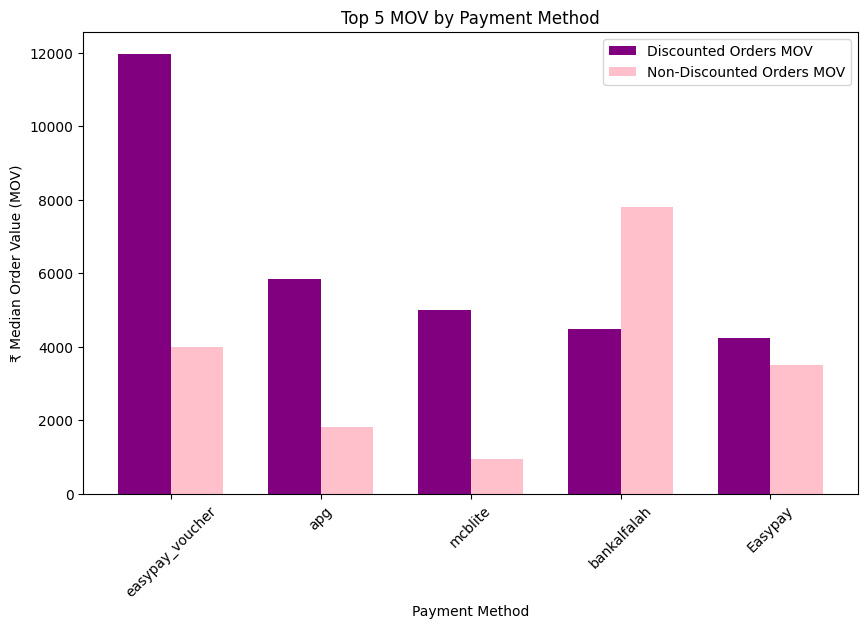

In [34]:
# Convert MOV columns back to numerical values for sorting
mov_by_payment['Discounted_Orders_MOV'] = mov_by_payment['Discounted_Orders_MOV'].apply(lambda x: float(x.replace('₹', '').replace(',', '')))
mov_by_payment['Non_Discounted_Orders_MOV'] = mov_by_payment['Non_Discounted_Orders_MOV'].apply(lambda x: float(x.replace('₹', '').replace(',', '')))

# Select the top 5 payment methods by discounted orders MOV
mov_by_payment_top5 = mov_by_payment.sort_values(by='Discounted_Orders_MOV', ascending=False).head(5)

# Plotting MOV by Payment (Top 5) - Side by Side Bar Chart
bar_width = 0.35
index = np.arange(len(mov_by_payment_top5))

plt.figure(figsize=(10, 6))
plt.bar(index, mov_by_payment_top5['Discounted_Orders_MOV'], bar_width, color='purple', label='Discounted Orders MOV')
plt.bar(index + bar_width, mov_by_payment_top5['Non_Discounted_Orders_MOV'], bar_width, color='pink', label='Non-Discounted Orders MOV')

plt.title('Top 5 MOV by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('₹ Median Order Value (MOV)')
plt.xticks(index + bar_width / 2, mov_by_payment_top5.index, rotation=45)
plt.legend()

plt.show()

- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Significant Contribution of Easypay_Voucher in Discounted Orders     | Easypay_Voucher stands out with a Median Order Value (MOV) of ₹ 11,970.00 for discounted orders, contributing 24.37% of the total MOV in this category. This indicates that when discounts are applied, customers using Easypay_Voucher tend to have significantly higher order values.   |
|     | In non-discounted orders, the MOV for Easypay_Voucher is much lower at ₹ 4,000.00, contributing only 2.79% to the total MOV in that category.     |
| High MOV in Financesettlement for Non-Discounted Orders    | The Financesettlement payment method shows an exceptionally high MOV of ₹ 85,491.00 in non-discounted orders, contributing a significant 59.68% to the total MOV in that category. This suggests that this payment method is associated with very high-value transactions when discounts are not applied.  |
|     | Notably, this payment method has no contribution to discounted orders, indicating that it might not be eligible for or commonly used in discounted transactions.   |
|  Low Contribution of COD (Cash on Delivery) in Discounted Orders    | The MOV for COD in discounted orders is relatively low at ₹ 999.00, contributing only 2.03% to the total MOV. This is lower compared to its contribution in non-discounted orders, where the MOV is ₹ 1,260.00, contributing 0.88%. This suggests that customers using COD tend to have smaller order values when discounts are applied.   |

--

3.5.3. Comparison Between Payment Method Distribution And MOV by Payment

- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| High Usage vs. High Value     | In the Payment Method Distribution analysis, methods like cod (Cash on Delivery) dominate the non-discounted orders, suggesting it’s the most frequently used payment method without discounts.   |
|      | However, in the MOV by Payment analysis, cod shows relatively lower median order values, indicating that while frequently used, the orders associated with this payment method are generally of lower value.   |
| Specialized Payment Methods     | The Payment Method Distribution highlights that methods like Easypay_Voucher and Payaxis are popular for discounted orders, representing a substantial proportion of these transactions.   |
|      | The MOV by Payment analysis reinforces this by showing high median order values for Easypay_Voucher in discounted transactions, indicating that these methods are not only popular but also associated with higher-value purchases.   |
| Anomalies in Payment Methods     | Payment Method Distribution shows financesettlement has no usage in discounted orders, yet dominates non-discounted orders by volume.   |
|      | MOV by Payment reveals that financesettlement is associated with exceptionally high median order values in non-discounted orders, confirming its role in high-value transactions.  |

--

### 3.6. Statistical Tests FOR MOV Comparison

3.6.1. Mannwhitneyu for Mverage Order Value (MOV) Comparison
- Mann-Whitney U Test (also known as the Wilcoxon rank-sum test): This test is the non-parametric equivalent of the T-test and does not assume normal distribution. It compares the medians of two independent samples.

In [54]:
stat, p_value = mannwhitneyu(discounted_orders['Order_Total'], non_discounted_orders['Order_Total'])
stat, p_value

(46596889178.5, 0.0)

- Interpretation:

| **Interpretation**                                        |
|:-------------------------------------------------------------:|
| Statistic Value (stat):   |
| The value 46596889178.5 represents the Mann-Whitney U statistic, which is used in the test to compare the distributions of two independent samples. The focus in interpretation typically shifts toward the p-value rather than the raw statistic.   |
| TStatistical Significance:   |
| The p-value of 0.0 suggests that there is a statistically significant difference between the median order totals of the two groups. This result strongly indicates that the variation in order totals is not random but likely influenced by the presence or absence of discounts.   |
| Conclusion:   |
| The test provides evidence that the median order total for discounted orders differs significantly from that of non-discounted orders. This suggests that discounts have a meaningful impact on the order totals, as reflected in the significant difference between the two medians.   | 

3.6.2. Chi-Square Test for Payment Method Distribution
- Conduct a chi-square test to determine if there’s a significant difference in payment method distribution between discounted and non-discounted orders.

In [36]:
# Chi-square test for payment method distribution
contingency_table = pd.crosstab(data['Payment_Method'], data['Discount_Amount'] > 0)
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p

(195419.80167831318, 0.0)

- Interpretation:

| **Interpretation**                                        |
|:-------------------------------------------------------------:|
| The Chi-Square test examines the relationship between payment methods and whether an order received a discount.   |
| A Chi-Square statistic of 195,419.80 is very large, and the P-value of 0.0 indicates a highly significant result.   |
| Conclusion:   |
| There is a statistically significant association between payment method and whether an order received a discount. This suggests that certain payment methods are more likely to be associated with discounted orders, or that the choice of payment method may influence the likelihood of receiving a discount.   |

5.6.3. Summary

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Impact of Discounts on Spending     | The T-test confirms that discounts significantly influence customer spending, with a clear difference in average order values between discounted and non-discounted orders.   |
| Payment Method Influence     | The Chi-Square test shows a strong relationship between the payment method used and whether the order was discounted. This suggests that certain payment methods might be targeted or preferred during promotional activities involving discounts.   |

### 5.7. Heat Map Correlation

5.7.1. Heat Map Correlation For Numerical And Encoded Category Columns

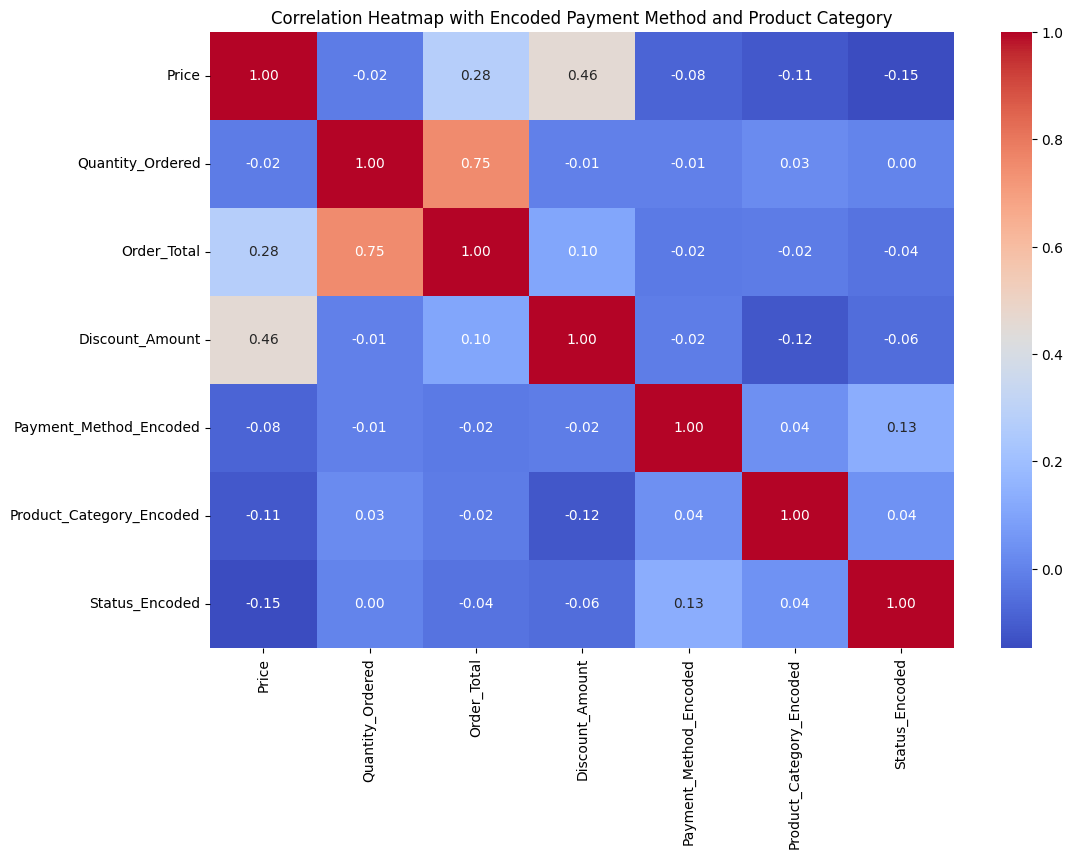

In [37]:
# Encode 'Payment_Method' and 'Product_Category' using LabelEncoder
label_encoder = LabelEncoder()
data['Payment_Method_Encoded'] = label_encoder.fit_transform(data['Payment_Method'])
data['Product_Category_Encoded'] = label_encoder.fit_transform(data['Product_Category'])
data['Status_Encoded'] = label_encoder.fit_transform(data['status'])

# Drop the 'Year', 'Month', and 'Customer_ID' columns
data_dropped = data.drop(columns=['Year', 'Month', 'Customer_ID'])

# Selecting numerical columns for the heatmap correlation, including the new encoded columns
numerical_columns = data_dropped.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data_dropped[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap with Encoded Payment Method and Product Category')
plt.show()

- Insights:

| **Heat Map** | **Insight** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Strong Correlations    | Quantity_Ordered and Order_Total (0.75)      | There is a strong positive correlation between the quantity ordered and the total order value. This is expected, as ordering more items generally leads to a higher total order value.      |
| Moderate Correlations  | Price and Order_Total (0.28)      | There is a moderate positive correlation between the price and the total order value. Higher prices contribute to higher order totals, but the correlation isn’t as strong as with quantity, suggesting that other factors like discounts also play a significant role.      |
|    | Price and Discount_Amount (0.46)      | A moderate positive correlation exists between price and discount amount. This indicates that higher-priced items are more likely to receive higher discounts.     |
| Weak or Negative Correlations    | Product_Category_Encoded and Price (-0.11)      | There is a weak negative correlation between the encoded product category and price. This could suggest that certain categories are generally associated with lower prices, though the correlation is not strong.      |
|    | Payment_Method_Encoded and Order_Total (-0.02)      | The correlation between the payment method and the order total is very weak and slightly negative, suggesting that the choice of payment method does not significantly influence the total order value.     |
|    | Payment_Method_Encoded and Discount_Amount (-0.02)      | This means that the choice of payment method does not significantly influence the discount amount received by the customer.     |

--

5.7.2. Difference Between Heat Map And Statistical Results
- Relationship Betweeen Payment Method and Discount Amount

| **Discrepancy** | **Analysis** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Chi-Square vs. Correlation    | The Chi-Square test      | Assessing whether there is a relationship between the type of payment method and the likelihood of receiving a discount. It tells us whether certain payment methods are statistically more likely to be associated with discounted or non-discounted orders, which is a categorical association.      |
|   | The correlation analysis      | Looks at how the payment method (now treated as a numerical value through encoding) is related to the actual discount amount. This measures whether using a specific payment method results in a higher or lower discount, which appears to be weak based on the correlation coefficient.      |
| Different Aspects of the Relationship   | The Chi-Square test      | Focused on the occurrence (whether an order is discounted or not)     |
|    |       | Focus: Relationship in terms of the number of discounted orders.     |
|     | The Correlation     | Focused on the magnitude (the actual amount of discount applied). A payment method might be strongly associated with receiving discounts (hence the significant Chi-Square result), but the specific discount amounts might still vary widely and not show a strong pattern (hence the weak correlation).      |
|    |       | Focus: Relationship in terms of the value of the discount.     |

- Summary:
The key takeaway is that while certain payment methods might be more associated with receiving discounts, the actual discount amounts given do not show a strong consistent relationship with the payment method.

### 5.7. Time-Series Analysis

5.7.1. Sales, Discount, And Quantity Sold Trend Line

In [38]:
# Aggregate sales by Year and Month
monthly_sales = data.groupby(['Year', 'Month']).agg({
    'Order_Total': 'sum',
    'Discount_Amount': 'sum',
    'Quantity_Ordered': 'sum'
}).reset_index()

# Convert 'Year' and 'Month' to a datetime format for better plotting
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))

# Sorting by 'YearMonth' to ensure correct plotting order
monthly_sales = monthly_sales.sort_values('YearMonth')

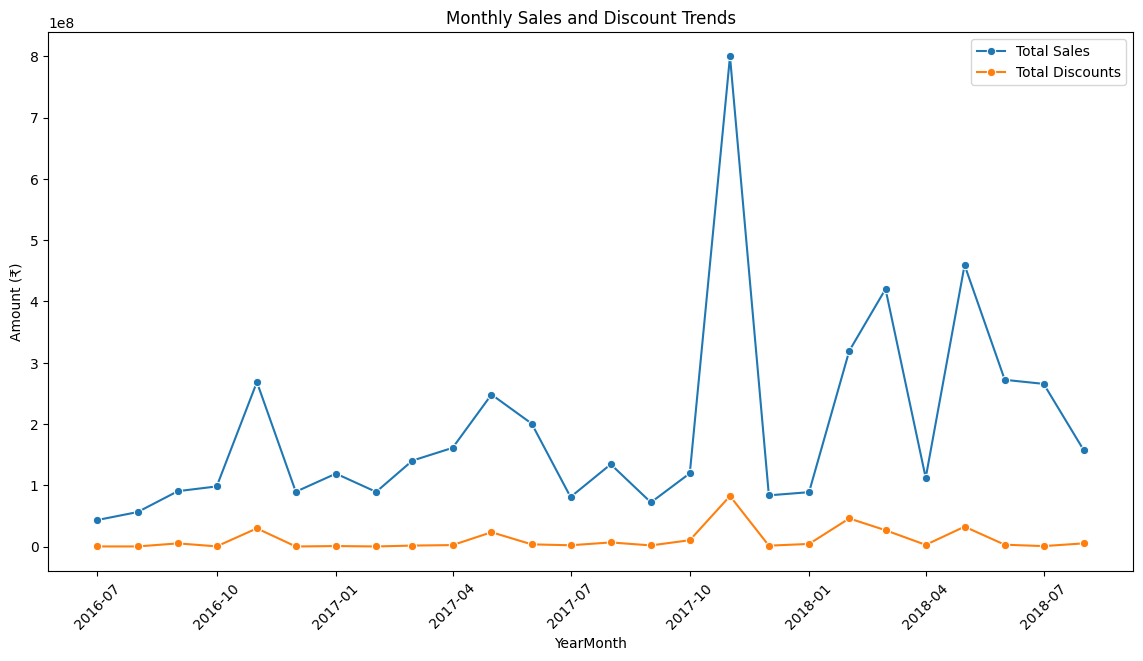

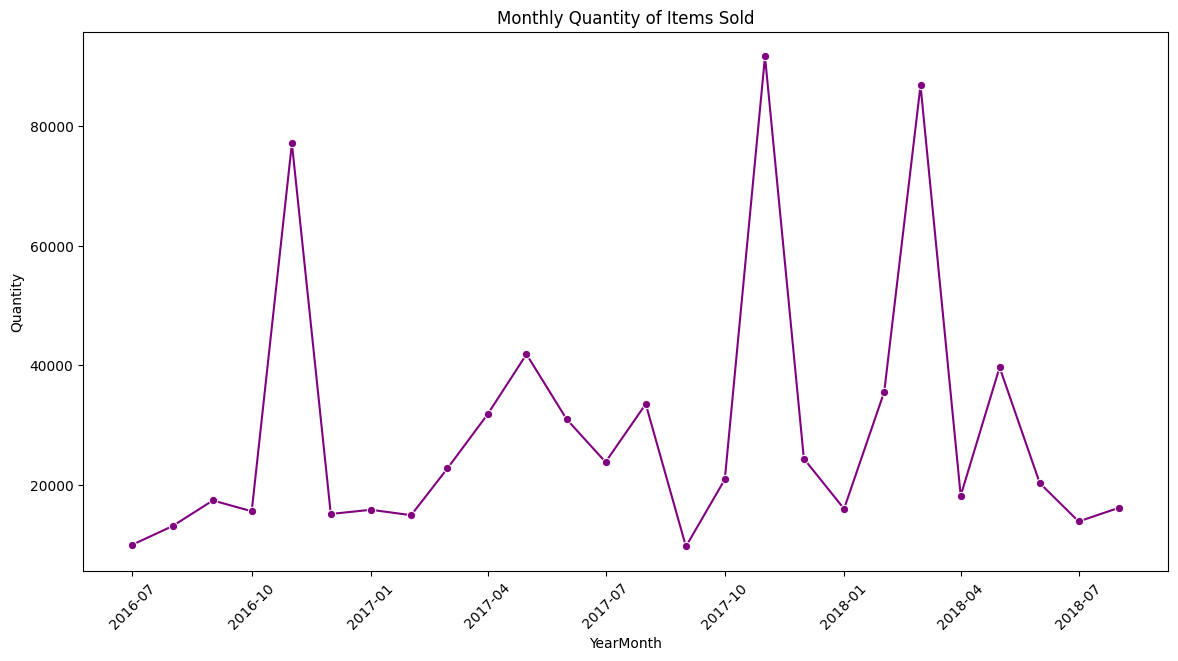

In [39]:
# Plotting monthly sales trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='Order_Total', data=monthly_sales, marker='o', label='Total Sales')
sns.lineplot(x='YearMonth', y='Discount_Amount', data=monthly_sales, marker='o', label='Total Discounts')
plt.title('Monthly Sales and Discount Trends')
plt.ylabel('Amount (₹)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting quantity of items sold each month
plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='Quantity_Ordered', data=monthly_sales, marker='o', color='purple')
plt.title('Monthly Quantity of Items Sold')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

- Insights:

| **Line** | **Analysis** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Monthly Sales and Discount Trends    | Sales Trend      | There is a noticeable peak in sales around October 2017, which could be due to a seasonal effect, a significant promotional event, or a special sales campaign during that period. The sharp spikes indicate periods of increased sales activity, which may correspond with certain months or events.      |
|   | Discount Trend      | The discount trend is relatively steady compared to the sales trend, although there are slight increases that may correspond with the peaks in sales. However, the overall level of discounts does not fluctuate as dramatically as sales, suggesting that while discounts may play a role in boosting sales, they are not the sole driver.      |
|    | Correlation      | The chart implies that there might be a correlation between discounts and sales spikes, but it does not fully explain the dramatic increases in sales seen in certain months. Further analysis might be needed to understand what other factors are driving these peaks.     |
| Monthly Quantity of Items Sold   |  Quantity Sold Trend     | Similar to the sales trend, there are distinct peaks in the quantity of items sold around the same periods, particularly in October 2017. This reinforces the idea that there were specific times when more items were sold, likely corresponding with high sales periods.     |
|     | Consistency     | The quantity sold shows a general upward trend leading up to each peak, followed by a decrease. This indicates that the demand for products might be seasonal or tied to specific events.      |
|    | Comparison with Sales      | The peaks in the quantity of items sold align with the peaks in sales, suggesting that these spikes are due to higher volumes of items being sold rather than higher prices.     |

- Implications:

| **Implication** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Seasonality     | The trends suggest a possible seasonality in sales and discounts, particularly with significant increases in certain months. This might warrant a deeper dive into those months to understand what specific factors (e.g., holidays, sales events) are contributing to the spikes.   |

--

5.7.2. Statistical Proof Of Correlation Between Sales And Discount Trend Lines

In [40]:
# Extract relevant data columns
sales = monthly_sales['Order_Total']
discounts = monthly_sales['Discount_Amount']

# Calculate the Spearman rank correlation coefficient and the p-value
spearman_correlation, p_value = stats.spearmanr(discounts, sales)

print(f"Spearman Rank Correlation Coefficient: {spearman_correlation}")
print(f"P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("There is a statistically significant correlation between discounts and sales.")
else:
    print("There is no statistically significant correlation between discounts and sales.")

Spearman Rank Correlation Coefficient: 0.7155555555555554
P-value: 3.969526691146094e-05
There is a statistically significant correlation between discounts and sales.


In [41]:
# Calculate the Kendall Tau correlation coefficient and the p-value
kendall_tau, p_value = stats.kendalltau(discounts, sales)

print(f"Kendall's Tau Correlation Coefficient: {kendall_tau}")
print(f"P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("There is a statistically significant correlation between discounts and sales.")
else:
    print("There is no statistically significant correlation between discounts and sales.")

Kendall's Tau Correlation Coefficient: 0.5446153846153846
P-value: 4.594304543929421e-05
There is a statistically significant correlation between discounts and sales.


- Interpretation:

| **Implication** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Strength of Correlation     | Both Spearman’s and Kendall’s coefficients are positive and relatively strong, suggesting a substantial positive relationship between the discount amounts and total sales. This means that as discount amounts increase, sales tend to increase as well.   |
|      | The Spearman coefficient (0.716) is higher than Kendall’s Tau (0.545), but both indicate a consistent trend.   |
| Statistical Significance    | The p-values for both tests are well below the common significance level of 0.05, confirming that the observed correlations are statistically significant. This implies that the relationship between discounts and sales is unlikely to be due to random chance.   |
| Conclusion    | These results provide strong evidence that discounting is associated with increased sales. The analysis suggests that when higher discounts are offered, sales tend to rise. This relationship is statistically significant, meaning it’s a consistent and meaningful pattern in the data.   |


--

5.7.3. Total Sales by Categories

1. Total Sales During Peak Seasons By Product Categories

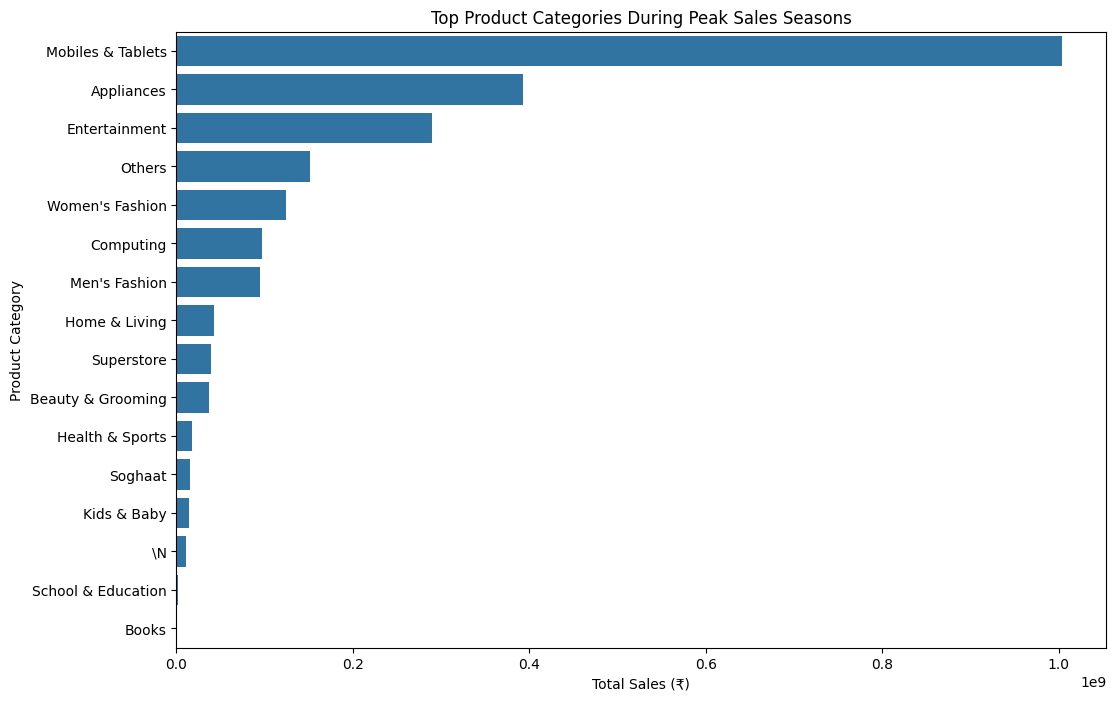

In [42]:
# Identify peak months (e.g., top 3 months with the highest sales across all years)
monthly_sales = data.groupby(['Year', 'Month']).agg({
    'Order_Total': 'sum'
}).reset_index()

# Identify the months with the highest sales
peak_months = monthly_sales.groupby('Month')['Order_Total'].sum().nlargest(3).index.tolist()

# Filter the data for only peak months
peak_season_data = data[data['Month'].isin(peak_months)]

# Group by product category and calculate total sales for each category during peak seasons
category_sales_peak_season = peak_season_data.groupby('Product_Category').agg({
    'Order_Total': 'sum'
}).reset_index()

# Sort categories by sales in descending order
category_sales_peak_season = category_sales_peak_season.sort_values(by='Order_Total', ascending=False)

# Plotting the top product categories during peak seasons
plt.figure(figsize=(12, 8))
sns.barplot(x='Order_Total', y='Product_Category', data=category_sales_peak_season)
plt.title('Top Product Categories During Peak Sales Seasons')
plt.xlabel('Total Sales (₹)')
plt.ylabel('Product Category')
plt.show()

2. Overall Sales All Years By Product Categories

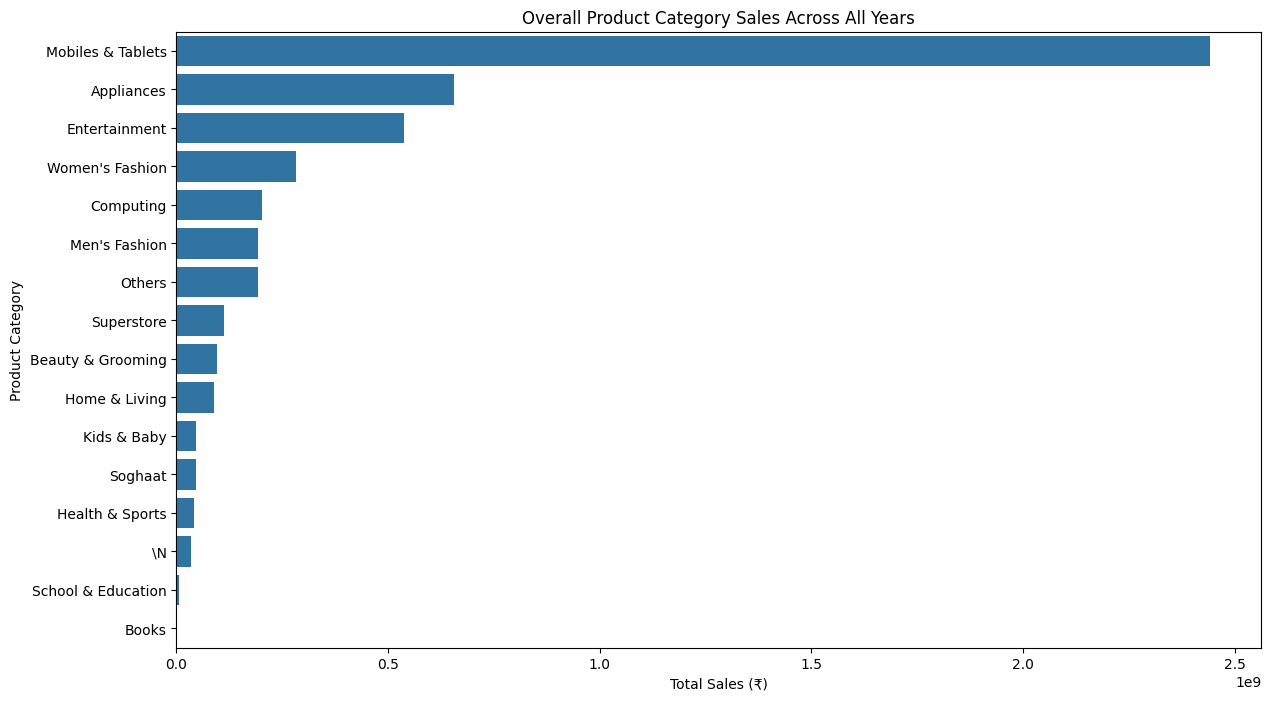

In [43]:
# Aggregate total sales by product category across all years
overall_sales = data.groupby('Product_Category').agg({
    'Order_Total': 'sum'
}).reset_index()

# Sort the data to have the categories in descending order of sales
overall_sales = overall_sales.sort_values(by='Order_Total', ascending=False)

# Plotting overall sales by product category
plt.figure(figsize=(14, 8))
sns.barplot(x='Order_Total', y='Product_Category', data=overall_sales)
plt.title('Overall Product Category Sales Across All Years')
plt.xlabel('Total Sales (₹)')
plt.ylabel('Product Category')
plt.show()

3. Comparison Between Peak Season Sales and Overall Sales by Product Category

| **Product** | **Season** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Mobiles & Tablets    | Peak Season      | Dominated sales significantly, far outpacing other categories.      |
|   | Overall      | Still the highest-selling category, but the dominance is more pronounced during peak seasons. This suggests that Mobiles & Tablets are heavily promoted or discounted during peak seasons, driving a surge in sales.      |
|  Appliances  | Peak Season      | The second-highest sales category, but with a noticeable gap behind Mobiles & Tablets.     |
|    |  Overall     | Similarly, it holds a strong position, though the gap between it and the top category is less drastic compared to peak seasons.     |
|  Entertainment   | Peak Season     | Holds a strong third place, indicating high consumer interest during promotional periods, possibly driven by holiday-related purchases.     |
|    | Overall      | Maintains its third-place position, indicating consistent interest both during peak seasons and throughout the year.     |
|  Women’s and Men’s Fashion   | Peak Season     |Shows moderate sales during peak seasons, with Women’s Fashion slightly ahead.     |
|    | Overall      | Women’s Fashion performs better overall, but Men’s Fashion still maintains a significant share. The consistency suggests that these categories have a steady demand but might not see as dramatic peaks during sales seasons.     |

- Implications:

| **Implication** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Promotional Strategy     | The dominance of Mobiles & Tablets during peak seasons suggests that targeted promotions or discounts on high-demand categories can significantly boost sales. The retail strategy could consider focusing even more on these categories during key sales periods to maximize revenue.   |
| Consistent Performers     |  Categories like Appliances and Entertainment, which perform well both during peak and off-peak times, could be part of a strategy that balances promotional intensity across different seasons to maintain consistent sales throughout the year.   |
| Fashion Categories    | Fashion categories show less dramatic fluctuations between peak and overall sales, indicating a steady demand that may not be as influenced by seasonal promotions. Retailers could explore whether more aggressive promotions in these categories could yield a higher impact.   |

--

### 5.8. Total Quantity By Product Categories

5.8.1. Peak Month Seasons And Overall Total Sales

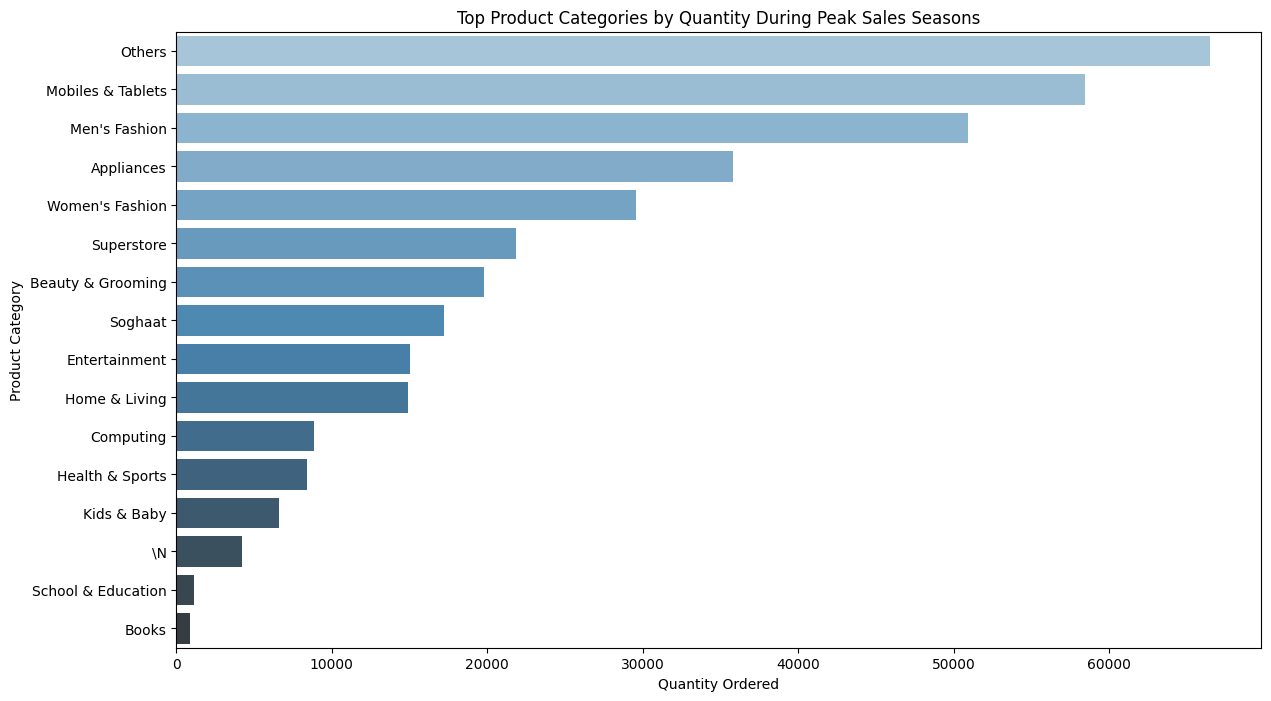

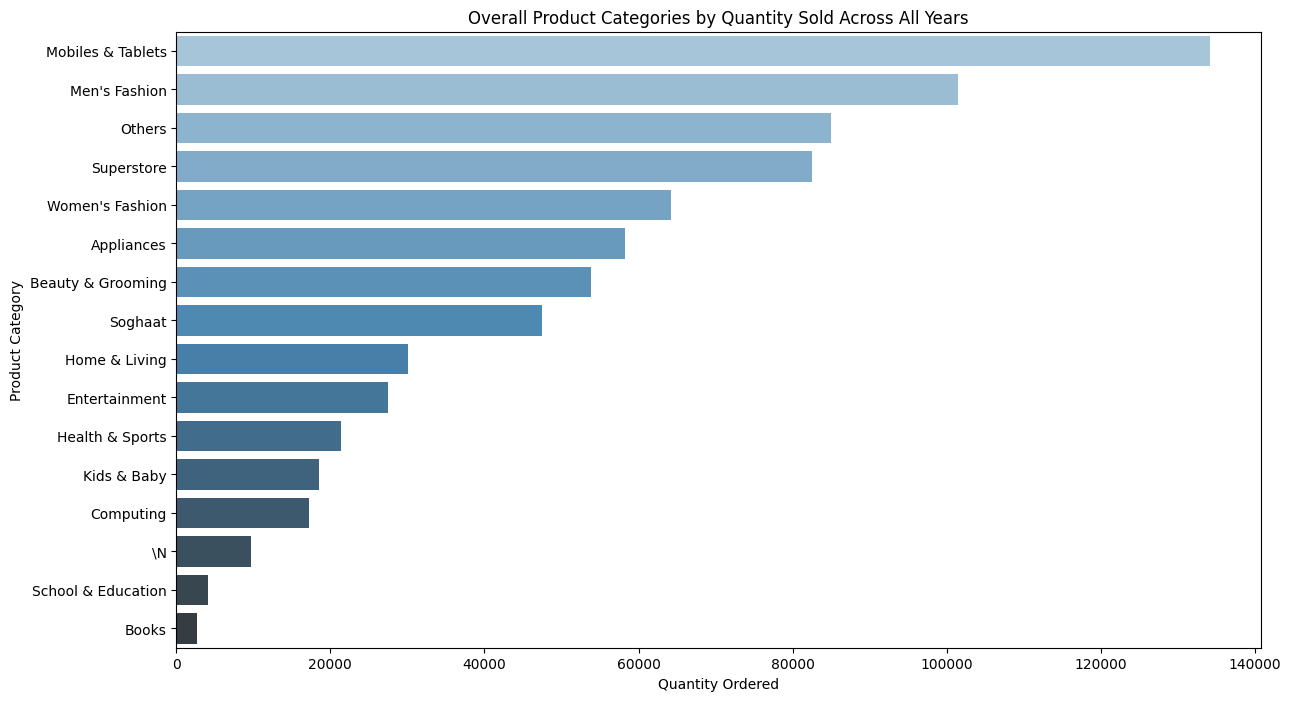

In [44]:
# Group by month and sum the 'Order_Total' to find the top 3 months with the highest sales
peak_months = monthly_sales.groupby('Month')['Order_Total'].sum().nlargest(3).index.tolist()

# Filter the original dataset for only those months that are identified as peak months
peak_season = data[data['Month'].isin(peak_months)]

# Grouping peak season data by product category and summing the quantity sold, then sorting
peak_quantity = peak_season.groupby('Product_Category').agg({
    'Quantity_Ordered': 'sum'
}).reset_index().sort_values(by='Quantity_Ordered', ascending=False)

# Grouping overall data by product category and summing the quantity sold, then sorting
overall_quantity = data.groupby('Product_Category').agg({
    'Quantity_Ordered': 'sum'
}).reset_index().sort_values(by='Quantity_Ordered', ascending=False)

# Plotting quantity comparison during peak season, sorted by highest to lowest
plt.figure(figsize=(14, 8))
sns.barplot(x='Quantity_Ordered', y='Product_Category', data=peak_quantity, palette='Blues_d')
plt.title('Top Product Categories by Quantity During Peak Sales Seasons')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Category')
plt.show()

# Plotting overall quantity comparison, sorted by highest to lowest
plt.figure(figsize=(14, 8))
sns.barplot(x='Quantity_Ordered', y='Product_Category', data=overall_quantity, palette='Blues_d')
plt.title('Overall Product Categories by Quantity Sold Across All Years')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Category')
plt.show()

- Insights:

| **Insight** | **Product** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Peak Sales Dominance by Category    | Mobiles & Tablets      | This category remains dominant in both peak seasons and overall sales. It suggests that this category consistently drives significant sales volume, both during peak periods and throughout the year.      |
|   | Others      | This category saw the highest quantity sold during peak seasons but dropped in overall sales, indicating that it may include a diverse range of products that perform exceptionally well during specific high-demand periods.      |
|    | Men’s Fashion & Appliances      | These categories show strong sales during peak seasons, with Men’s Fashion ranking higher in quantity during peak times than in overall sales. This might suggest seasonality or special events boosting these categories.     |
| Category Variability   |  Superstore & Beauty & Grooming     | These categories saw relatively higher sales during peak seasons compared to their overall yearly performance, which could indicate that these categories benefit more from seasonal promotions or specific events.     |
|     | Computing     | This category is further down the list during peak seasons compared to overall sales, suggesting less seasonality or a lower impact of seasonal promotions on this category.     |

- Implications:

| **Implication** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Strategic Marketing     | Categories that show increased performance during peak seasons, such as Beauty & Grooming and Superstore, may benefit from targeted promotions during these times to maximize sales.   |
| Product Strategy     |   Understanding which categories see spikes in peak seasons versus steady sales throughout the year can help in inventory planning, promotional activities, and understanding customer behavior related to seasonality.   |

--

### 5.9. Order Status Analysis

5.9.1. Order Status Count

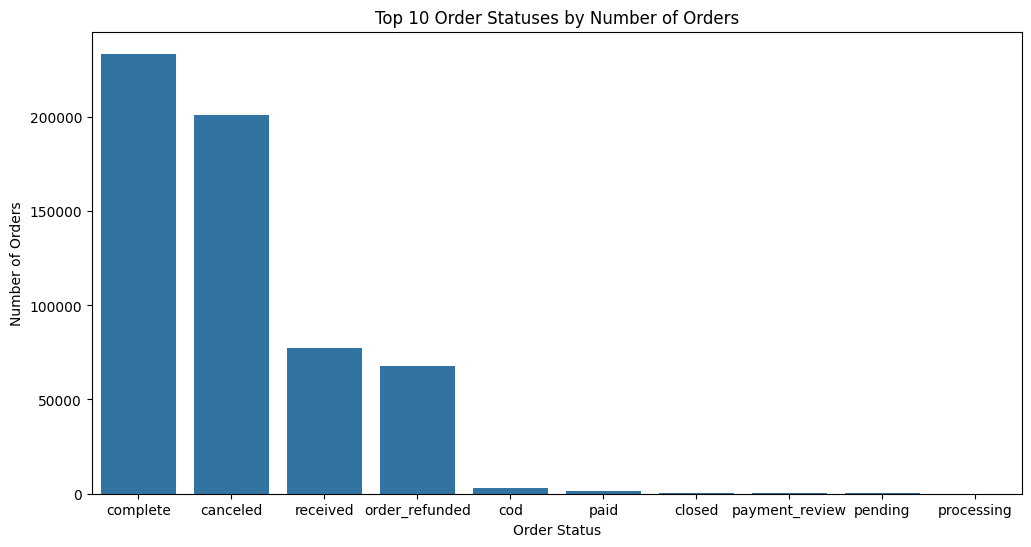

In [45]:
# Count the number of orders by status and take the top 10
order_status_counts = data['status'].value_counts().nlargest(10)

# Plot the number of orders by status (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values)
plt.title('Top 10 Order Statuses by Number of Orders')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()

In [46]:
order_status_counts

status
complete          233700
canceled          201249
received           77290
order_refunded     67579
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
Name: count, dtype: int64

- Given that the number of canceled and order_refunded orders are significant and appear in the top 10 order statuses, it makes sense to focus on analyzing these two categories in depth.

--

5.9.2. 'canceled' And 'order_refunded' Status Analysis

1. Trend Lines All Years

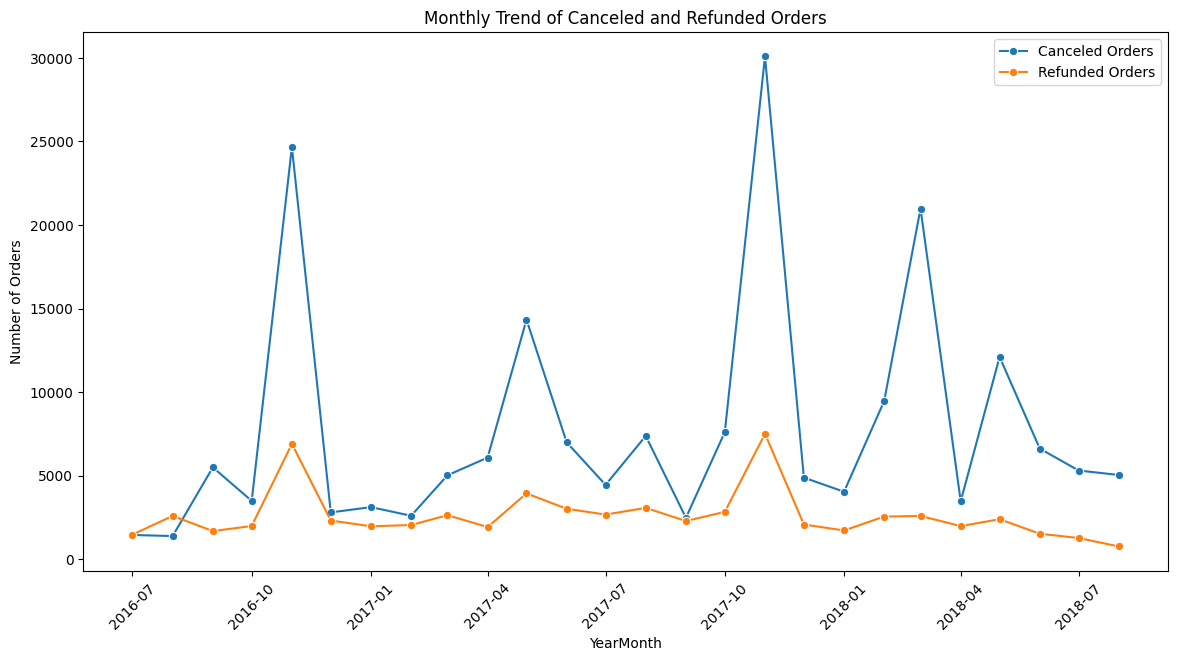

In [47]:
# Filter the data for canceled and refunded orders
canceled_data = data[data['status'] == 'canceled']
refunded_data = data[data['status'] == 'order_refunded']

# Aggregate the number of orders by month and year for each status
canceled_monthly = canceled_data.groupby(['Year', 'Month']).size().reset_index(name='Canceled_Orders')
refunded_monthly = refunded_data.groupby(['Year', 'Month']).size().reset_index(name='Refunded_Orders')

# Merge the dataframes to have both trends in one
monthly_trends = pd.merge(canceled_monthly, refunded_monthly, on=['Year', 'Month'], how='outer').fillna(0)

# Sort the data by Year and Month
monthly_trends.sort_values(by=['Year', 'Month'], inplace=True)

# Convert Year and Month to datetime format for better plotting
monthly_trends['YearMonth'] = pd.to_datetime(monthly_trends[['Year', 'Month']].assign(DAY=1))

# Plotting the trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='Canceled_Orders', data=monthly_trends, marker='o', label='Canceled Orders')
sns.lineplot(x='YearMonth', y='Refunded_Orders', data=monthly_trends, marker='o', label='Refunded Orders')
plt.title('Monthly Trend of Canceled and Refunded Orders')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Spike in Cancellations During High Sales Periods     | In both graphs, particularly around October and November 2016 and 2017, there is a noticeable spike in the number of canceled orders. These spikes coincide with significant peaks in total sales during the same periods.   |
|      | This suggests that during high sales periods, such as festive seasons or major promotional events, the volume of canceled orders increases. This could be due to various factors, including supply chain issues, customer indecision, or increased fraudulent activity during such periods.   |
| Refunded Orders Are More Stable     | The number of refunded orders shows a much more stable trend compared to canceled orders. Although there are minor increases in refunded orders around the same peak sales periods, the spikes are not as dramatic as those in canceled orders.   |
|      | This might imply that while customers are more likely to cancel orders during peak periods, the rate of refund requests (i.e., after the order is completed and the product is delivered) remains relatively consistent.  |
| Potential Impact on Customer Retention     | High cancellation rates during peak sales periods might indicate potential issues with inventory management, order processing, or customer satisfaction during these times. If not addressed, this could impact customer retention, as frequent cancellations might lead to dissatisfaction.   |

2. Statistical Analysis Correlation With Total Sales Trend Line

In [48]:
# Reset the index to make sure all columns are available
data_reset = data.reset_index()

# Group data by 'Year' and 'Month' and calculate the total number of orders
total_orders = data_reset.groupby(['Year', 'Month']).agg({
    'item_id': 'count'  # Count the number of orders per month
}).reset_index()

# Calculate the number of canceled orders
canceled_orders = data_reset[data_reset['status'] == 'canceled'].groupby(['Year', 'Month']).agg({
    'item_id': 'count'  # Count the number of canceled orders per month
}).reset_index()

# Calculate the number of refunded orders
refunded_orders = data_reset[data_reset['status'] == 'order_refunded'].groupby(['Year', 'Month']).agg({
    'item_id': 'count'  # Count the number of refunded orders per month
}).reset_index()

# Merge the dataframes
monthly_canceled_refunded = total_orders.merge(canceled_orders, on=['Year', 'Month'], how='left', suffixes=('', '_canceled'))
monthly_canceled_refunded = monthly_canceled_refunded.merge(refunded_orders, on=['Year', 'Month'], how='left', suffixes=('', '_refunded'))

# Rename the columns for clarity
monthly_canceled_refunded.columns = ['Year', 'Month', 'Total Orders', 'Canceled Orders', 'Refunded Orders']

# Replace NaN values with 0 (in case some months have no canceled or refunded orders)
monthly_canceled_refunded['Canceled Orders'].fillna(0, inplace=True)
monthly_canceled_refunded['Refunded Orders'].fillna(0, inplace=True)

# Proceed with the correlation analysis as planned

In [49]:
# Calculate Spearman's Rank Correlation for Canceled Orders vs. Total Sales
spearman_canceled_sales_corr, spearman_canceled_sales_p = spearmanr(monthly_canceled_refunded['Canceled Orders'], monthly_sales['Order_Total'])
print(f"Spearman Rank Correlation (Canceled Orders vs. Total Sales): {spearman_canceled_sales_corr}")
print(f"P-value: {spearman_canceled_sales_p}")

# Calculate Spearman's Rank Correlation for Refunded Orders vs. Total Sales
spearman_refunded_sales_corr, spearman_refunded_sales_p = spearmanr(monthly_canceled_refunded['Refunded Orders'], monthly_sales['Order_Total'])
print(f"Spearman Rank Correlation (Refunded Orders vs. Total Sales): {spearman_refunded_sales_corr}")
print(f"P-value: {spearman_refunded_sales_p}")

# Calculate Kendall's Tau Correlation for Canceled Orders vs. Total Sales
kendall_canceled_sales_corr, kendall_canceled_sales_p = kendalltau(monthly_canceled_refunded['Canceled Orders'], monthly_sales['Order_Total'])
print(f"Kendall's Tau Correlation (Canceled Orders vs. Total Sales): {kendall_canceled_sales_corr}")
print(f"P-value: {kendall_canceled_sales_p}")

# Calculate Kendall's Tau Correlation for Refunded Orders vs. Total Sales
kendall_refunded_sales_corr, kendall_refunded_sales_p = kendalltau(monthly_canceled_refunded['Refunded Orders'], monthly_sales['Order_Total'])
print(f"Kendall's Tau Correlation (Refunded Orders vs. Total Sales): {kendall_refunded_sales_corr}")
print(f"P-value: {kendall_refunded_sales_p}")

Spearman Rank Correlation (Canceled Orders vs. Total Sales): 0.865982905982906
P-value: 1.0995166876026844e-08
Spearman Rank Correlation (Refunded Orders vs. Total Sales): 0.2676923076923077
P-value: 0.1861284492408197
Kendall's Tau Correlation (Canceled Orders vs. Total Sales): 0.68
P-value: 1.0318341390342641e-07
Kendall's Tau Correlation (Refunded Orders vs. Total Sales): 0.16923076923076924
P-value: 0.23653490275785774


- Insights:

| **Insight** | **Statistic Test** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Canceled Orders vs. Total Sales    | Spearman’s Rank Correlation: 0.866      | P-value: 1.0995166876026844e-08      |
|   |      |This suggests a strong positive correlation between the number of canceled orders and total sales. The very low p-value indicates that this correlation is statistically significant, meaning it’s highly unlikely to have occurred by chance.     |
|    | Kendall’s Tau Correlation: 0.680      | P-value: 1.0318341390342641e-07     |
|    |       | Kendall’s Tau also indicates a strong positive correlation, which is consistent with the Spearman result. The p-value further supports the statistical significance of this correlation.     |
| Refunded Orders vs. Total Sales    | Spearman’s Rank Correlation: 0.268      | P-value: 0.186128449248091      |
|   |      |This shows a weak positive correlation between refunded orders and total sales, with a higher p-value, suggesting that this correlation is not statistically significant.     |
|    | Kendall’s Tau Correlation: 0.169      | P-value: 0.23653490275785774     |
|    |       | Kendall’s Tau also indicates a weak positive correlation, consistent with Spearman’s result, and the p-value again suggests that the correlation is not statistically significant.     |

- Implications:

| **Status** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Canceled Orders     | The strong and statistically significant positive correlation between canceled orders and total sales suggests that during months with higher sales, there are also significantly more canceled orders. This could be due to a variety of reasons, such as a higher volume of transactions leading to more cancellations, or issues related to inventory management, customer service, or order fulfillment during peak sales periods.   |
|  Refunded Orders    | The weak and statistically insignificant correlation between refunded orders and total sales suggests that refunded orders do not have a strong relationship with the total sales amount. This could imply that refunds are relatively consistent across different sales volumes or that other factors, such as product quality or customer satisfaction, influence refunds independently of sales volume.   |

3. Distribution of Canceled And Refuned Status Order By Product Category

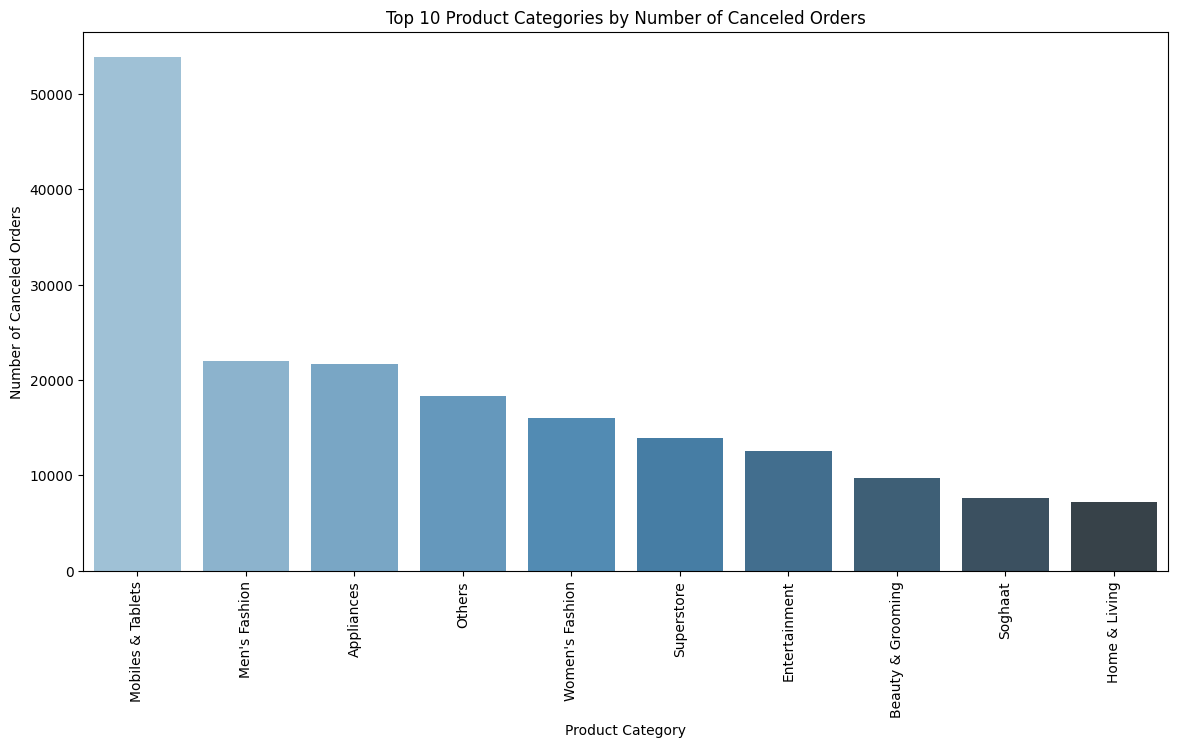

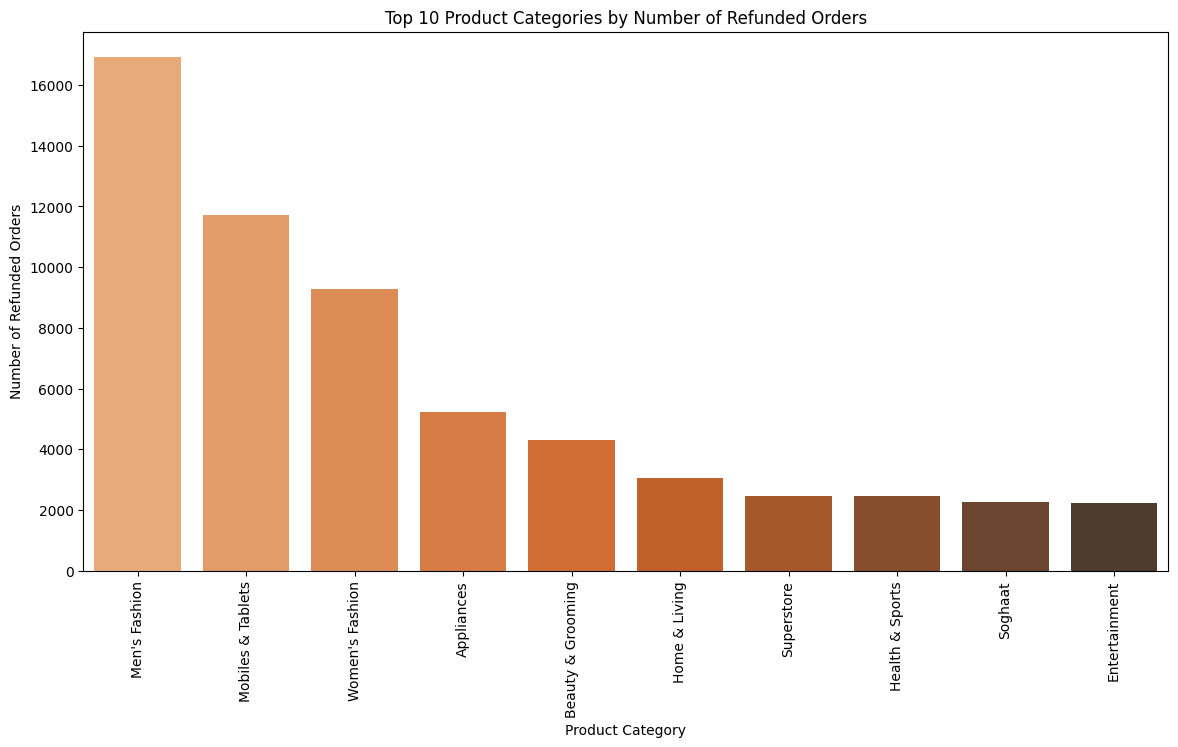

In [50]:
# Group the data by 'Product_Category' and 'Order_Status'
canceled_orders_by_category = data[data['status'] == 'canceled'].groupby('Product_Category').size().nlargest(10)
refunded_orders_by_category = data[data['status'] == 'order_refunded'].groupby('Product_Category').size().nlargest(10)

# Plot the distribution for the top 10 canceled orders
plt.figure(figsize=(14, 7))
sns.barplot(x=canceled_orders_by_category.index, y=canceled_orders_by_category.values, palette="Blues_d")
plt.title('Top 10 Product Categories by Number of Canceled Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Canceled Orders')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution for the top 10 refunded orders
plt.figure(figsize=(14, 7))
sns.barplot(x=refunded_orders_by_category.index, y=refunded_orders_by_category.values, palette="Oranges_d")
plt.title('Top 10 Product Categories by Number of Refunded Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Refunded Orders')
plt.xticks(rotation=90)
plt.show()

The two bar charts present a comparison between the top 10 product categories based on the number of canceled and refunded orders. 


- Insights:

| **Status** | **Product** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Canceled Orders    | Mobiles & Tablets      | Have the highest number of canceled orders by a significant margin, followed by Men’s Fashion and Appliances.      |
|   |      | This suggests that high-value items like Mobiles & Tablets are more prone to cancellations, which could be due to reasons such as change of mind, price changes, or better deals elsewhere.     |
|    | Men’s Fashion and Appliances     | Also see a substantial number of cancellations, possibly due to sizing issues, availability of newer models, or delivery delays.     |
| Refunded Orders   |  Men’s Fashion     | Leads in the number of refunded orders, followed by Mobiles & Tablets and Women’s Fashion.     |
|     |       | This indicates that fashion items, particularly those related to men’s and women’s fashion, are more likely to be returned, possibly due to incorrect sizing, dissatisfaction with the product, or a change in preference.      |
|   | Mobiles & Tablets      | also see a significant number of refunds, which could be due to defects, dissatisfaction with the product features, or damage during shipping.     |

- Implications:
    1. The high number of cancellations and refunds in these categories could highlight issues such as customer dissatisfaction, logistical challenges, or mismatches between customer expectations and the actual product delivered.
    2. For high-value categories like Mobiles & Tablets, both high cancellation and refund rates may suggest a need for better customer education, clearer product descriptions, or enhanced customer support to reduce these occurrences.
    3. For fashion items, particularly Men’s Fashion, the high refund rate might indicate a need for better size guides, clearer product visuals, or more flexible return policies.

- Summary: This analysis can guide strategic decisions, such as focusing on improving customer satisfaction in specific categories, enhancing product descriptions, or adjusting inventory and logistics practices to reduce cancellations and refunds.

4. Impact of Canceled And Refunded Orders On Customer Retention
    - compare the retention rates between customers with canceled/refunded orders and those without.
    - determine if there is a significant difference in retention rates, which could indicate whether canceled or refunded orders negatively impact customer retention.

In [51]:
# Identify customers with canceled and refunded orders
canceled_customers = data[data['status'] == 'canceled']['Customer_ID'].unique()
refunded_customers = data[data['status'] == 'order_refunded']['Customer_ID'].unique()

# Identify all customers and calculate retention rate
all_customers = data['Customer_ID'].unique()

# Customers who placed more than one order
retained_customers = data.groupby('Customer_ID').size().loc[lambda x: x > 1].index

# Retention rates
retention_rate_overall = len(retained_customers) / len(all_customers)
retention_rate_canceled = len(set(retained_customers) & set(canceled_customers)) / len(canceled_customers)
retention_rate_refunded = len(set(retained_customers) & set(refunded_customers)) / len(refunded_customers)

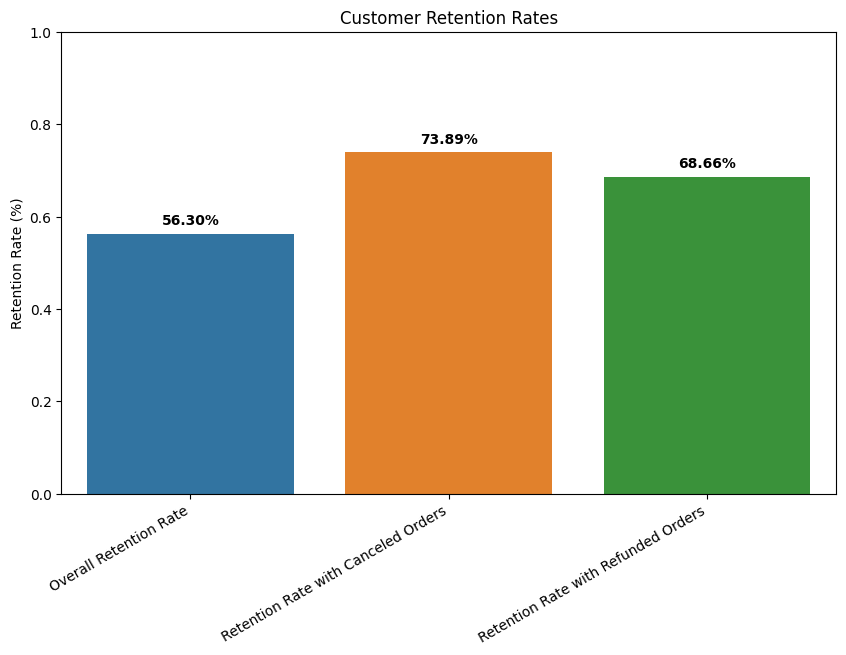

In [52]:
# Data for visualization
categories = ['Overall Retention Rate', 'Retention Rate with Canceled Orders', 'Retention Rate with Refunded Orders']
values = [retention_rate_overall, retention_rate_canceled, retention_rate_refunded]

# Assign colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example colors

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette=colors)
plt.ylim(0, 1)
plt.title('Customer Retention Rates')
plt.ylabel('Retention Rate (%)')

# Add percentage labels above the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v*100:.2f}%', ha='center', color='black', fontweight='bold')

# Improve x-axis readability
plt.xticks(rotation=30, ha='right')

plt.show()

- Insights:

| **Customer** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Overall Retention Rate (56.30%)     | This means that slightly over half of the customers made more than one purchase, indicating they were retained.   |
|  Retention Rate for Customers with Canceled Orders (73.89%)   | This is notably higher than the overall retention rate. It suggests that even though these customers experienced a canceled order, they were still likely to return and make another purchase. This could imply that the company has effective strategies in place to mitigate the impact of canceled orders.   |
|  Retention Rate for Customers with Refunded Orders (68.66%)   | Similarly, this rate is higher than the overall retention rate, though slightly lower than for canceled orders. This indicates that customers who had orders refunded were also likely to return, though not as much as those with canceled orders. This might suggest that refunded orders have a slightly more negative impact on customer retention than canceled orders.   |

---

# 6. Conclusion
### 6.1. Conculsion
The analysis of Pakistan’s e-commerce dataset from March 2016 to August 2018 has provided valuable insights into customer behavior, the impact of discounts, and the performance of various payment methods. Key findings include:

| **Conclusion** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Impact of Discounts     | Discounts significantly increase the median order value (MOV), with discounted orders showing nearly double the MOV compared to non-discounted orders. However, non-discounted orders still contribute more to overall revenue due to their higher volume.   |
|     | There is a statistically significant correlation between the amount of discount offered and the increase in total sales, indicating that discounts are an effective tool for boosting sales.   |
|  Payment Methods   | Cash on Delivery (COD) dominates as the preferred payment method for non-discounted orders, while Easypay, Easypay_Voucher, and Payaxis are more popular for discounted orders.  |
|     | The analysis revealed that certain payment methods, such as Easypay_Voucher, are associated with significantly higher MOVs for discounted orders, indicating their potential for driving high-value transactions.  |
|  Order Status and Customer Retention   | Cancellations and refunds are more frequent during peak sales periods, particularly for high-value categories like Mobiles & Tablets and fashion items. This trend suggests potential issues with inventory management or customer expectations during these periods.  |
|     | The strong correlation between total sales and the number of canceled orders indicates that as sales volume increases, so does the likelihood of cancellations, potentially impacting customer satisfaction and retention. |
|     | Customer retention rates are notably lower among customers who experienced cancellations or refunds, highlighting the need for strategies to address these issues. |
|  Product Categories   | Mobiles & Tablets, Appliances, and Entertainment categories dominate both overall sales and peak season sales, suggesting that these categories are key drivers of revenue.  |
|     | Fashion items, while popular, show a higher propensity for refunds, indicating the need for better product descriptions, sizing guides, or return policies to reduce return rates. |


---

# 7. Recommendation

### 7.1. Recommendation

| **Recommendation** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Enhance Discount Strategies     | Given the effectiveness of discounts in increasing MOV, it is recommended to strategically apply discounts to high-margin products or during specific promotional periods to maximize revenue without significantly impacting overall profitability.   |
|     | Focus on payment methods like Easypay_Voucher that are associated with higher MOVs when offering discounts, to encourage larger purchases.   |
|  Improve Order Fulfillment and Inventory Management   | To reduce cancellations during peak sales periods, it is crucial to enhance inventory management and ensure that stock levels can meet increased demand. This could involve better forecasting, real-time inventory updates, and improving supplier relationships.  |
|     | Address customer satisfaction issues related to cancellations and refunds by improving order tracking, communication, and offering proactive customer support during peak periods.  |
|  Optimize Payment Method Offerings   | Promote payment methods that are associated with higher MOVs, such as Easypay_Voucher and Payaxis, especially during discount campaigns. This can be done through targeted incentives or exclusive offers. |
| Focus on High-Value Product Categories    | Continue to prioritize Mobiles & Tablets, Appliances, and Entertainment categories in marketing and inventory planning, as these consistently drive the most revenue. |
|     | Implement targeted strategies for fashion items, such as offering better product visuals and more accurate size guides, to reduce refund rates and improve customer satisfaction. |
|  Customer Retention Programs   | Develop customer retention programs focused on customers who have experienced cancellations or refunds. This could include offering personalized discounts, faster resolution of issues, or loyalty rewards to encourage repeat purchases.  |
|     | Monitor and address the root causes of cancellations and refunds to improve overall customer satisfaction and retention rates. |